carry(currency, today, )

In [35]:
import pandas as pd
import numpy as np
import datetime
import openpyxl as opy
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
data_file = pd.ExcelFile('PortfolioDaily Data.xlsx')

INFO = pd.read_excel(data_file, 'Info',index_col=0).fillna(0)
#  reads information about the currencies (potentially weights, benchmarks, etc.) from the 'Info' sheet.
#INFO['O/R 1m'] = 0
#INFO['O/R 3m'] = 0
#INFO['ROLL'] = 0

P_SPOT = pd.read_excel(data_file, 'Spot',header=2,index_col=0)[2:]
dt_index = [x.date() for x in P_SPOT.index.tolist()]
P_SPOT.index = dt_index
P_SPOT.columns = INFO.index.tolist()

P_FWD1M = pd.read_excel(data_file, 'Forward 1M',header=2,index_col=0)[2:]
P_FWD1M.index = dt_index
P_FWD1M.columns = INFO.index.tolist()

P_FWD2M = pd.read_excel(data_file, 'Forward 2M',header=2,index_col=0)[2:]
P_FWD2M.index = dt_index
P_FWD2M.columns = INFO.index.tolist()

P_FWD3M = pd.read_excel(data_file, 'Forward 3M',header=2,index_col=0)[2:]
P_FWD3M.index = dt_index
P_FWD3M.columns = INFO.index.tolist()
# The code loads spot and forward exchange rates for different currencies. Forwards are loaded for 1 month, 2 months, and 3 months. It sets the index of these DataFrames to the dates.
CDR = pd.read_excel(data_file, 'CDR',header=2)[2:].reset_index(drop=True)
# reads data related to currency deposit rates (CDR).
DF_C = pd.read_excel(data_file, 'DF Curve',header=0,index_col=0).dropna()
dt_index = [x.date() for x in DF_C.index.tolist()]
DF_C.index = dt_index

DF_C[::] = 1
#DF_C = pd.read_excel(data_file, 'DF Curve',header=0,index_col=0).dropna() loads the discount factor curve, which is used to calculate present values of future cash flows
SIZE_B = pd.read_excel(data_file, 'Size (Benchmark)',header=0,index_col=0)
dt_index = [x.date() for x in SIZE_B.index.tolist()]
SIZE_B.index = dt_index

SIZE_A = pd.read_excel(data_file, 'Size_A',header=0,index_col=0).dropna()
dt_index = [x.date() for x in SIZE_A.index.tolist()]
SIZE_A.index = dt_index


SIZE_M = pd.read_excel(data_file, 'Size_M',header=0,index_col=0).dropna()
dt_index = [x.date() for x in SIZE_M.index.tolist()]
SIZE_M.index = dt_index
# The code reads data related to the size or notional amount of the portfolio or benchmark (SIZE_B, SIZE_A, SIZE_M). 
#SIZE_M = pd.read_excel(data_file, 'Size_M (2)',header=0,index_col=0).dropna()
#dt_index = [x.date() for x in SIZE_M.index.tolist()]
#SIZE_M.index = dt_index

P_A = pd.read_excel(data_file, 'Price_A',header=0,index_col=0).dropna(axis=0,how='all')
dt_index = [x.date() for x in P_A.index.tolist()]
P_A.index = dt_index
# historical price of the portfolio 

del dt_index

In [66]:
P_A

,BRL,CLP,CNY,COP,CZK,HUF,IDR,MYR,MXN,PEN,...,THB,TRY,INR,SGD,TWD,KRW,UAH,EGP,EUR,JPY
2021-10-06,NaN,NaN,NaN,3782.70,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.1831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,5.6735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3431,4.0145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.2300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,74.7700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-07,NaN,NaN,NaN,3907.15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,849.28,NaN,NaN,NaN,321.53,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1196.99,NaN,NaN,1.1310,115.9900
2022-01-24,NaN,797.99,NaN,NaN,NaN,318.49,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
DF_C

,1,2,3,4,5,6,7,8,9,10,...,96,97,98,99,100,101,102,103,104,105
2021-03-17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-18,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-06-23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-06-24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-06-27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [52]:
Curncy_List = INFO.index.tolist()
Init_Cap = 10**8
Incept_Dt = datetime.date(2021,3,18)

In [53]:
def Add_Bday(start_dt,add_days,holidays=[]): # calculates a future date that is a certain number of business days ahead of a given start date, taking into account weekends and optional holidays
    
    while add_days > 0:
        start_dt += datetime.timedelta(1)
        if start_dt.weekday() >= 5 or start_dt in holidays:
            continue
        add_days -= 1
        
    return start_dt

In [54]:
def Sub_Bday(start_dt,sub_days,holidays=[]):
    
    while sub_days > 0:
        start_dt -= datetime.timedelta(1)
        if start_dt.weekday() >= 5 or start_dt in holidays:
            continue
        sub_days -= 1
        
    return start_dt

In [55]:
def Spot_Dt(curncy,p_dt): #The function determines the date when a spot foreign exchange transaction will settle. The spot settlement date is typically a few business days after the trade date (pricing date).

    
    add_days = int(INFO.loc[curncy,'Spot Settle'][2])
    FD_ig = bool(INFO.loc[curncy,'FD Ignore'])
    
    holiday_US = []
    for index,x in CDR['USD'].items():
        if str(x) != 'nan':
            holiday_US.append(x.date())
    holiday = []
    for index,x in CDR[curncy].items():
        if str(x) != 'nan':
            holiday.append(x.date())
    if FD_ig:
        s_dt = Add_Bday(Add_Bday(p_dt,1,holiday),1,holiday_US+holiday)
    else:
        s_dt = Add_Bday(p_dt,add_days,holiday_US+holiday)
        
    return s_dt

# The function returns s_dt, which is the calculated spot settlement date.

In [56]:
def Fwd_Dt(curncy,p_dt,months):
    #It determines the date when a forward contract will expire and the exchange of currencies will occur. The maturity date is typically calculated by adding the contract length (e.g., 3 months) to the spot settlement date, but it also needs to adjust for weekends, holidays, and specific market conventions.
    s_dt = Spot_Dt(curncy,p_dt)
    
    holiday = []
    for index,x in CDR['USD'].items():
        if str(x) != 'nan':
            holiday.append(x.date())
    for index,x in CDR[curncy].items():
        if str(x) != 'nan':
            holiday.append(x.date())
    
    try:
        f_dt = Add_Bday(s_dt.replace(year=s_dt.year+1 if s_dt.month+months>12 else s_dt.year,
                        month=s_dt.month+months-12 if s_dt.month+months>12 else s_dt.month+months)
                        -datetime.timedelta(1),1,holiday)
        if f_dt.month != s_dt.month+months and f_dt.month != s_dt.month+months-12:
            f_dt = Sub_Bday(datetime.date(year=s_dt.year+1 if s_dt.month+months>11 else s_dt.year,
                        month=s_dt.month+months-11 if s_dt.month+months>11 else s_dt.month+months+1, day=1),1,holiday)
    except:
        f_dt = Sub_Bday(datetime.date(year=s_dt.year+1 if s_dt.month+months>11 else s_dt.year,
                        month=s_dt.month+months-11 if s_dt.month+months>11 else s_dt.month+months+1, day=1),1,holiday)
    
    if Add_Bday(s_dt,1,holiday).month != s_dt.month and curncy != 'RUB':
    #if Add_Bday(s_dt,1,holiday).month != s_dt.month:
        f_dt = Sub_Bday(datetime.date(year=s_dt.year+1 if s_dt.month+months>11 else s_dt.year,
                            month=s_dt.month+months-11 if s_dt.month+months>11 else s_dt.month+months+1, day=1),1,holiday)
    
    return f_dt

In [57]:
def Roll_Dt(curncy,stl_dt):
    
    roll_dt = stl_dt          
    while True:
        roll_dt -= datetime.timedelta(1)
        while roll_dt.weekday() >= 5:
            roll_dt -= datetime.timedelta(1)
        if Fwd_Dt(curncy,roll_dt,1) <= stl_dt:
            break
        
    return roll_dt
#The function Roll_Dt calculates the roll date for a currency forward contract, which is the last date on which you can enter into a new 1-month forward contract that matures on or before a given settlement date.

In [58]:
def Intp_P_Fwd(curncy,p_dt,stl_dt):
    #The function Intp_P_Fwd calculates the interpolated forward price for a currency forward contract with a specific settlement date that falls between the standard 1-month, 2-month, and 3-month forward maturities.
    fwd1_pd = P_FWD1M.loc[p_dt,curncy]/INFO.loc[curncy,'Tick Size']/(Fwd_Dt(curncy,p_dt,1)-p_dt).days
    fwd2_pd = (P_FWD2M.loc[p_dt,curncy]-P_FWD1M.loc[p_dt,curncy])/ \
            INFO.loc[curncy,'Tick Size']/(Fwd_Dt(curncy,p_dt,2)-Fwd_Dt(curncy,p_dt,1)).days
    fwd3_pd = (P_FWD3M.loc[p_dt,curncy]-P_FWD2M.loc[p_dt,curncy])/ \
            INFO.loc[curncy,'Tick Size']/(Fwd_Dt(curncy,p_dt,3)-Fwd_Dt(curncy,p_dt,2)).days
    
    p_dt = Add_Bday(p_dt,1)
    fwd1_dt = Fwd_Dt(curncy,p_dt,1)
    fwd2_dt = Fwd_Dt(curncy,p_dt,2)
    fwd3_dt = Fwd_Dt(curncy,p_dt,3)
    
    return fwd1_pd*max(min((fwd1_dt-p_dt).days,(stl_dt-p_dt).days),0) + \
           fwd2_pd*max(min((fwd2_dt-fwd1_dt).days,(stl_dt-fwd1_dt).days),0) + \
           fwd3_pd*max(min((fwd3_dt-fwd2_dt).days,(stl_dt-fwd2_dt).days),0)

In [59]:
class Contract:
    def __init__(self,curncy,PB,op_dt,cl_dt,stl_dt,size,op_sp,op_fwd,c_size=0,
                 stat='Outstanding',sp_fl=0,c_fl=0,op_f=0,cl_f=0):
        self.curncy = curncy
        self.PB = PB
        self.op_dt = op_dt
        self.cl_dt = cl_dt
        self.stl_dt = stl_dt
        self.size = size
        self.op_sp = op_sp
        self.op_fwd = op_fwd
        self.c_size = c_size
        self.stat = stat
        self.sp_fl = sp_fl
        self.c_fl = c_fl
        self.op_f = op_f
        self.cl_f = cl_f

In [60]:
def Transact_Cost(curncy,p_dt,stl_dt):#The function Transact_Cost calculates the estimated transaction cost for a currency forward contract with a specific settlement date, considering the bid-ask spread (or offer/rate spread) for 1-month and 3-month forwards.
    
    fwd1_dt = Fwd_Dt(curncy,p_dt,1)
    fwd3_dt = Fwd_Dt(curncy,p_dt,3)
    p_dt = Sub_Bday(p_dt,1)
    f3m = INFO.loc[curncy,'O/R 3m']/P_SPOT.loc[p_dt,curncy]/2
    f1m = INFO.loc[curncy,'O/R 1m']/P_SPOT.loc[p_dt,curncy]/2
    
    if stl_dt == fwd1_dt:
        fee = f1m
    elif stl_dt == fwd3_dt:
        fee = f3m
    else:
        fee = f1m + (f3m-f1m)/(fwd3_dt-fwd1_dt).days*(stl_dt-fwd1_dt).days
    # It uses linear interpolation to estimate the transaction cost based on the 1-month and 3-month spreads and the relative position of the desired settlement date between these maturities.
    return fee

#prtf: Indicates whether the portfolio is 'A' (active portfolio) or another type.

#PB: Indicates whether the contract is a 'P' (purchase/long) or 'S' (sale/short).
#op_sp: The initial spot price at which the contract was entered.
#op_fwd: The initial forward price at which the contract was entered.
#c_size: The contract size or notional amount.
#v_dt: The valuation date (the date on which you are calculating the MTM value).
#stl_dt: The settlement date of the forward contract.
#v_fwd = Intp_P_Fwd(curncy, v_dt, stl_dt): It calls the Intp_P_Fwd function to get the interpolated forward price for the given currency, valuation date, and settlement date.
#The formulas used to calculate the spot and forward components represent the profit or loss from the change in spot and forward prices, respectively. They are scaled by the contract size and discounted to the valuation date using the discount factor.
        v_sp = P_A.loc[Add_Bday(v_dt,1),curncy] # spot price (v_sp) for the currency pair curncy from a data source called P_A

#The function Contrct_Value calculates the mark-to-market (MTM) value of a currency forward contract, separating the value into spot and forward components.
#(v_sp + v_fwd) in the denominator is being used as a normalization factor to calculate the contribution of each leg (spot and forward) to the overall contract value rather than as a direct calculation of P&L or return.

In [67]:
def Contrct_Value(prtf,curncy,PB,op_sp,op_fwd,c_size,v_dt,stl_dt):
    if prtf=='A' and PB=='P' and Add_Bday(v_dt,1) in P_A.index and not np.isnan(P_A.loc[Add_Bday(v_dt,1),curncy]):
        v_sp = P_A.loc[Add_Bday(v_dt,1),curncy]   #prtf: Indicates whether the portfolio is 'A' (active portfolio) or another type.

    else:
        v_sp = P_SPOT.loc[v_dt,curncy]
    
    v_fwd = Intp_P_Fwd(curncy,v_dt,stl_dt)
    days_diff = (stl_dt - v_dt).days
    if days_diff not in DF_C.columns:
        closest_column = min(DF_C.columns, key=lambda x: abs(x - days_diff))
        df = DF_C.loc[v_dt, closest_column]
    else:
        df = DF_C.loc[v_dt, days_diff]
    #df = DF_C.loc[v_dt,(stl_dt-v_dt).days] # reads discount factor here on right index (basically 3 months columns and dates. but assumes discount is same for each currency ? )

    if curncy != 'EUR':
        return (op_sp-v_sp)/(v_sp+v_fwd)*c_size*df, (op_fwd-v_fwd)/(v_sp+v_fwd)*c_size*df 
    else:
        return (v_sp-op_sp)/(op_sp+op_fwd)*c_size*df, (v_fwd-op_fwd)/(op_sp+op_fwd)*c_size*df 

If the position size changes:
It checks if the last contract is still outstanding.
If outstanding, it handles rolling:
It calculates the roll date (roll_dt).
It enters a loop to roll the contracts until the current date (dt) is after the roll date.
Inside the rolling loop:
It calculates the new spot price (r_sp), settlement date (r_stl_dt), and forward price (r_fwd).
If there are multiple outstanding contracts, it closes them and creates a new rolled contract with the combined size.
Otherwise, it rolls the single outstanding contract.
After rolling, if the new size is zero, it closes all outstanding contracts.
If the new size is non-zero and has the same sign as the previous size, it adjusts the position by adding a new contract.
If the new size has a different sign, it closes existing contracts and creates a new one with the new size and maturity.

If the position size doesn't change:
It creates a new Contract object.
Roll Contracts to Today:
After processing all dates in the SIZE DataFrame, it checks if there are outstanding contracts.
If so, it rolls them forward until today's date (tday_dt) using a similar rolling logic as before.
Add Benchmark Contracts (if applicable):
If the portfolio is not the benchmark ('B'), it recursively calls Constrct_Ct with the benchmark portfolio ('B') to add benchmark contracts to the list.
Return Value:
The function returns the list of Contract objects (Contrct), representing the complete history of forward positions in the portfolio.

ogic Breakdown:
Initialization:
Contrct: An empty list to store Contract objects.
tday_dt: Today's date.
SIZE: Retrieves a global variable (SIZE_B or SIZE_P) based on the prtf input, likely containing position sizes for each currency.
PB: Sets the portfolio identifier ('B' or 'P') for contract creation.
Iterate through Currencies:
Curncy_List: Assumed to be a list of currency codes (e.g., 'USD', 'JPY', 'EUR').
For each curncy in Curncy_List:
Ct: An empty list to store contracts for the current currency.
Iterate through Dates and Sizes:
SIZE[curncy].items(): Iterates through dates (dt) and position sizes (size) for the current currency from the SIZE dictionary.
Determine Spot Price:
If prtf is 'A' and the date is in P_A (likely a price series) and the price is not NaN, use the price from P_A.
Otherwise, use the spot price from P_SPOT one business day before the current date.
Calculate Forward Price:
stl_dt: Calculate the settlement date using Fwd_Dt (likely adds 3 days to the current date).
fwd: Interpolate the forward price using Intp_P_Fwd.
Contract Creation and Management:
First Contract:
If Ct is empty and size is not zero, create a new Contract object and append it to Ct.
Subsequent Contracts:
If size is different from the previous size (prev_size):
Outstanding Contracts:
If the last contract in Ct is 'Outstanding':
Calculate roll_size and o_ct (number of outstanding contracts).
roll_dt: Calculate the rollover date using Roll_Dt.
Rolling Over Contracts:
While the current date (dt) is greater than the rollover date:
Calculate rolled spot price, settlement date, and forward price.
If there are multiple outstanding contracts (o_ct > 1):
Close all outstanding contracts and create a new rolled contract with the combined size.
Otherwise (single outstanding contract):
Roll the last contract and create a new rolled contract.
Update roll_dt, roll_size, and o_ct.
Closing or Adjusting Position:
If size is zero, close all outstanding contracts.
Otherwise:
If the sign of the new size matches the sign of the rolled size, adjust the position by creating a new contract with the difference in size.
Otherwise, close all outstanding contracts and create a new contract with the new size.
Other Cases:
Create a new Contract object and append it to Ct.
Update prev_size.
Rollover after Iteration:
If Ct is not empty and the last contract is 'Outstanding':
Similar to the rollover logic within the date iteration, roll over contracts until today's date (tday_dt).
Combine Contracts:
Add the contracts for the current currency (Ct) to the overall Contrct list.
Handle Non-Benchmark Portfolio:
If prtf is not 'B', recursively call Constrct_Ct (presumably with 'B' as the portfolio) and add the resulting contracts to Contrct.
Return Contracts:
Return the Contrct list.


In [62]:
#The function Constrct_Ct constructs a list of Contract objects representing the currency forward positions in a portfolio, handling position sizing, rolling, and closing of contracts over time.
#simulates the trading activity in a portfolio by creating and managing forward contracts based on the specified position sizes and rolling strategy.
backtest_end_date = datetime.date(2024, 6, 25) # added 


def Constrct_Ct(prtf='B'):
    Contrct = []
    tday_dt = datetime.date.today()
    SIZE = globals()['SIZE_'+prtf]
    SIZE = SIZE[SIZE.index <= backtest_end_date] 

    if prtf == 'B':
        PB = 'B'
    else: PB = 'P'
    for curncy in Curncy_List:
        Ct = []
        for dt,size in SIZE[curncy].items():
            if prtf == 'A' and dt in P_A.index and not np.isnan(P_A.loc[dt,curncy]):
                sp = P_A.loc[dt,curncy]
            else:
                sp = P_SPOT.loc[Sub_Bday(dt,1),curncy]
            stl_dt = Fwd_Dt(curncy,dt,3)
            fwd = Intp_P_Fwd(curncy,Sub_Bday(dt,1),stl_dt)
            if len(Ct) == 0:
                if size != 0:
                    Ct.append(Contract(curncy,PB,dt,'',stl_dt,size,sp,fwd))
            elif size != prev_size:
                if Ct[-1].stat == 'Outstanding':
                    roll_size = 0
                    o_ct = 0
                    roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
                    tday_dt = P_SPOT.index[-1]
                    for x in Ct:
                        if x.stat == 'Outstanding':
                            roll_size += x.size
                            o_ct += 1
                    while dt > roll_dt:
                        r_sp = P_SPOT.loc[Sub_Bday(roll_dt,1),curncy]
                        r_stl_dt = Fwd_Dt(curncy,roll_dt,3)
                        r_fwd = Intp_P_Fwd(curncy,Sub_Bday(roll_dt,1),r_stl_dt)
                        if o_ct > 1:
                            for x in Ct:
                                if x.stat == 'Outstanding':
                                    x.cl_dt = roll_dt
                                    x.stat = 'Closed'
                            Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                               r_sp,r_fwd))
                        else:
                            Ct[-1].cl_dt = roll_dt
                            Ct[-1].stat = 'Rolled'
                            Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                               r_sp,r_fwd))
                        roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
                        roll_size = Ct[-1].size
                        o_ct = 1
                    if size == 0:
                        for x in Ct:
                            if x.stat == 'Outstanding':
                                x.cl_dt = dt
                                x.stat = 'Closed'
                    else:
                        if roll_size*size > 0:
                            Ct.append(Contract(curncy,PB,dt,'',Ct[-1].stl_dt,size-roll_size,sp,
                                               Intp_P_Fwd(curncy,Sub_Bday(dt,1),Ct[-1].stl_dt)))
                        else:
                            for x in Ct:
                                if x.stat == 'Outstanding':
                                    x.cl_dt = dt
                                    x.stat = 'Closed'
                            Ct.append(Contract(curncy,PB,dt,'',stl_dt,size,sp,fwd))
                else:
                    Ct.append(Contract(curncy,PB,dt,'',stl_dt,size,sp,fwd))
            prev_size = size
        if len(Ct) > 0 and Ct[-1].stat == 'Outstanding':
            roll_size = 0
            o_ct = 0
            roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
            for x in Ct:
                if x.stat == 'Outstanding':
                    roll_size += x.size
                    o_ct += 1
            while tday_dt >= roll_dt and roll_dt <= backtest_end_date: # instead of while tday_dt >= roll_dt
                calculated_date = Sub_Bday(roll_dt, 1)
                if calculated_date in P_SPOT.index and calculated_date <= backtest_end_date:
                    r_sp = P_SPOT.loc[calculated_date, curncy]
                else:
            # Handle missing date, e.g., use the last available date's value
                    r_sp = P_SPOT.loc[:calculated_date, curncy].iloc[-1]
                #r_sp = P_SPOT.loc[Sub_Bday(roll_dt,1),curncy]
                r_stl_dt = Fwd_Dt(curncy,roll_dt,3)
                r_fwd = Intp_P_Fwd(curncy,Sub_Bday(roll_dt,1),r_stl_dt)
                if o_ct > 1:
                    for x in Ct:
                        if x.stat == 'Outstanding':
                            x.cl_dt = roll_dt
                            x.stat = 'Closed'
                    Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                       r_sp,r_fwd))
                else:
                    Ct[-1].cl_dt = roll_dt
                    Ct[-1].stat = 'Rolled'
                    Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                       r_sp,r_fwd))
                roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
                roll_size = Ct[-1].size
                o_ct = 1
        Contrct += Ct
    if prtf != 'B':
        Contrct += Constrct_Ct()
    return Contrct

In [16]:
############# tests on Constrct_Ct

def test_Constrct_Ct():
    """Tests the Constrct_Ct function with various scenarios."""

    # Test Case 1: Empty Size Data
    empty_size_df = pd.DataFrame(index=DF_C.index[:10], columns=Curncy_List).fillna(0)
    contracts_empty = Constrct_Ct(empty_size_df, prtf='Custom')
    assert len(contracts_empty) == 0, "Expected empty contract list for empty size data."

    # Test Case 2: Constant Size Data
    constant_size_df = pd.DataFrame(index=DF_C.index[:10], columns=Curncy_List).fillna(0.1)
    contracts_constant = Constrct_Ct(constant_size_df, prtf='Custom')
    # Add assertions to check contract details (open/close dates, size, etc.)

    # Test Case 3: Changing Size Data
    changing_size_df = pd.DataFrame(index=DF_C.index[:10], columns=Curncy_List).fillna(0.1)
    changing_size_df.loc[DF_C.index[5]:, "EUR"] = 0.2  # Increase EUR weight after a certain date
    contracts_changing = Constrct_Ct(changing_size_df, prtf='Custom')
    # Add assertions to check contract details (rolling, new contracts, etc.)

    print("Constrct_Ct tests passed!")

test_Constrct_Ct()

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3506521895.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  empty_size_df = pd.DataFrame(index=DF_C.index[:10], columns=Curncy_List).fillna(0)


TypeError: Constrct_Ct() got multiple values for argument 'prtf'

In [17]:
def Constrct_Ct_2(weights_df, prtf='Custom'):
    """
    Constructs a list of FX forward contracts based on a DataFrame of daily weights.

    Args:
        weights_df (pd.DataFrame): DataFrame with daily dates as index and currency codes as columns, 
                                   containing the desired weights for each currency's forward contract.
        prtf (str, optional): Portfolio type identifier. Defaults to 'Custom'.

    Returns:
        list: A list of Contract objects representing the FX forward contracts. 
    """

    Contrct = []
    tday_dt = datetime.date.today()
    PB = 'P'  # Assuming 'P' (Paid) for custom portfolios 

    for curncy in weights_df.columns:
        Ct = []
        prev_size = 0  
        for dt in weights_df.index:
            weight = weights_df.loc[dt, curncy]
            size = float(weight) * float(Init_Cap) / float(P_SPOT.loc[Sub_Bday(dt, 1), curncy])


            if len(Ct) == 0:
                if size != 0:
                    sp = P_SPOT.loc[Sub_Bday(dt, 1), curncy]
                    stl_dt = Fwd_Dt(curncy, dt, 3)
                    fwd = Intp_P_Fwd(curncy, Sub_Bday(dt, 1), stl_dt)
                    Ct.append(Contract(curncy, PB, dt, '', stl_dt, size, sp, fwd))
            elif size != prev_size:
                if Ct[-1].stat == 'Outstanding':
                    roll_size = 0
                    o_ct = 0
                    roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
                    for x in Ct:
                        if x.stat == 'Outstanding':
                            roll_size += x.size
                            o_ct += 1
                    while dt > roll_dt:
                        r_sp = P_SPOT.loc[Sub_Bday(roll_dt,1),curncy]
                        r_stl_dt = Fwd_Dt(curncy,roll_dt,3)
                        r_fwd = Intp_P_Fwd(curncy,Sub_Bday(roll_dt,1),r_stl_dt)
                        if o_ct > 1:
                            for x in Ct:
                                if x.stat == 'Outstanding':
                                    x.cl_dt = roll_dt
                                    x.stat = 'Closed'
                            Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                               r_sp,r_fwd))
                        else:
                            Ct[-1].cl_dt = roll_dt
                            Ct[-1].stat = 'Rolled'
                            Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                               r_sp,r_fwd))
                        roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
                        roll_size = Ct[-1].size
                        o_ct = 1
                    if size == 0:
                        for x in Ct:
                            if x.stat == 'Outstanding':
                                x.cl_dt = dt
                                x.stat = 'Closed'
                    else:
                        if roll_size*size > 0:
                            Ct.append(Contract(curncy,PB,dt,'',Ct[-1].stl_dt,size-roll_size,sp,
                                               Intp_P_Fwd(curncy,Sub_Bday(dt,1),Ct[-1].stl_dt)))
                        else:
                            for x in Ct:
                                if x.stat == 'Outstanding':
                                    x.cl_dt = dt
                                    x.stat = 'Closed'
                            Ct.append(Contract(curncy,PB,dt,'',stl_dt,size,sp,fwd))
                else:
                    Ct.append(Contract(curncy,PB,dt,'',stl_dt,size,sp,fwd))
            prev_size = size
        if len(Ct) > 0 and Ct[-1].stat == 'Outstanding':
            roll_size = 0
            o_ct = 0
            roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
            for x in Ct:
                if x.stat == 'Outstanding':
                    roll_size += x.size
                    o_ct += 1
            while tday_dt >= roll_dt:
                r_sp = P_SPOT.loc[Sub_Bday(roll_dt,1),curncy]
                r_stl_dt = Fwd_Dt(curncy,roll_dt,3)
                r_fwd = Intp_P_Fwd(curncy,Sub_Bday(roll_dt,1),r_stl_dt)
                if o_ct > 1:
                    for x in Ct:
                        if x.stat == 'Outstanding':
                            x.cl_dt = roll_dt
                            x.stat = 'Closed'
                    Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                       r_sp,r_fwd))
                else:
                    Ct[-1].cl_dt = roll_dt
                    Ct[-1].stat = 'Rolled'
                    Ct.append(Contract(curncy,PB,roll_dt,'',r_stl_dt,roll_size,
                                       r_sp,r_fwd))
                roll_dt = Roll_Dt(Ct[-1].curncy,Ct[-1].stl_dt)
                roll_size = Ct[-1].size
                o_ct = 1
        Contrct += Ct

    return Contrct  

The Constrct_Ct_2 function emulates a rolling 3-month forward strategy with dynamic position sizing based on provided weights. Here's a breakdown of the key elements of the logic:
Initial Contract:

If the Ct list is empty (meaning no contract exists for the current currency), and the size (calculated from the input weight) is not zero, a new contract is opened with the following parameters:
curncy: Current currency being processed.
PB: 'P' (Paid), as assumed for custom portfolios.
op_dt: Current date (dt).
stl_dt: Settlement date calculated using Fwd_Dt for 3 months forward.
size: Calculated size based on the weight and Init_Cap.
sp: Spot rate from P_SPOT for the day before the current date.
fwd: Interpolated forward rate using Intp_P_Fwd.
Contract Adjustment (Size Change):
If the current size is different from the prev_size (indicating a change in target weight), the code checks if the last contract in Ct is 'Outstanding'.
If there's an outstanding contract, the logic handles potential rolling and adjustment:
Rolling: The code determines the roll date (roll_dt) using Roll_Dt. It then iterates from the current date (dt) back to the roll date.
Multiple Outstanding Contracts: If there are multiple outstanding contracts (o_ct > 1), it closes all outstanding contracts on the roll date and opens a new contract with the combined size (roll_size).
Single Outstanding Contract: If there's only one outstanding contract, it's rolled on the roll date, meaning its stat is changed to 'Rolled', and a new contract is opened.
New Contract Size: If the new size is zero, all outstanding contracts are closed. If not zero, a new contract is created with the difference between the new size and the rolled size (size - roll_size) if they have the same sign. Otherwise, all outstanding contracts are closed, and a new contract is opened with the new size.
After processing all dates in the weights_df, if any contracts are still outstanding, they are rolled forward to the current date (tday_dt) using similar rolling logic as described above.


Contract Size Construction:
The size of the contract is determined based on the following:
weight: The target weight for the currency obtained from the weights_df for the current date (dt).
Init_Cap: The initial capital of the portfolio.
P_SPOT: The spot exchange rate for the currency on the day before the current date.
The calculation is as follows:
size = weight * Init_Cap / P_SPOT.loc[Sub_Bday(dt, 1), curncy]

In [18]:
##### test function Constrct_Ct_2
Curncy_List = ["BRL", "CLP", "CNY", "COP", "CZK", "HUF", "IDR", "MYR", "MXN", 
               "PEN", "PHP", "PLN", "RON", "RUB", "ZAR", "THB", "TRY", "INR", 
               "SGD", "TWD", "KRW", "UAH", "EGP", "EUR", "JPY"]
Init_Cap = 1000000  # Example: 1 million in base currency
test_weights_df = pd.DataFrame(index=DF_C.index[1:10], columns=Curncy_List)  # Using a subset of dates for testing
num_currencies = len(Curncy_List)
for curncy in Curncy_List:
    test_weights_df[curncy] = 1 / num_currencies 
# 2. Call the Constrct_Ct_2 function with the test weights
test_contracts = Constrct_Ct_2(test_weights_df)

# 3. Print or inspect the output
print(f"Number of contracts generated: {len(test_contracts)}")
print("\nDetails of the first 5 contracts:")
for i in range(min(5, len(test_contracts))):
    contract = test_contracts[i]
    print(f"Contract {i+1}: Currency={contract.curncy}, Size={contract.size:.2f}, Start Date={contract.op_dt}, Settle Date={contract.stl_dt}, Status={contract.stat}")


KeyError: datetime.date(2022, 7, 25)

In [19]:
weights_df = pd.DataFrame(index=DF_C.index[1:10], columns=Curncy_List).fillna(0)  # Initialize all weights to 0
weights_df["BRL"] = 0.1  # Set BRL weight to 0.1 (10%)


C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/1623557046.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weights_df = pd.DataFrame(index=DF_C.index[1:10], columns=Curncy_List).fillna(0)  # Initialize all weights to 0


In [36]:

def test_Calc_Perfmce_BRL_only():
    """Tests Calc_Perfmce with a portfolio containing only BRL."""

    # Create weights DataFrame with only BRL
    weights_df = pd.DataFrame(index=DF_C.index[1:10], columns=Curncy_List).fillna(0)  # Initialize all weights to 0
    weights_df["BRL"] = 0.1  # Set BRL weight to 0.1 (10%)

    # Construct contracts and calculate performance
    contracts = Constrct_Ct_2(weights_df)
    sumry_p, sumry_b, sumry, drift, curncy_bd = Calc_Perfmce(contracts, prtf='Custom', incl_bmk=False)

    # Assertions (add more specific assertions as needed)
    assert sumry_p.shape[0] == 9, "Expected 9 rows in the summary DataFrame."
    assert sumry_p["BRL Spot MTM"].iloc[0] == 0, "Expected initial Spot MTM for BRL to be zero."

    # Plot BRL PnL
    plt.figure(figsize=(12, 6))
    plt.plot(sumry_p.index.to_numpy(), sumry_p["Total Nominal"].to_numpy(), label="BRL PnL")
    plt.xlabel("Date")
    plt.ylabel("BRL PnL")
    plt.title("BRL Portfolio PnL")
    plt.legend()
    plt.grid(True)
    plt.show()

In [58]:
    # Create weights DataFrame with only BRL
weights_df = pd.DataFrame(index=DF_C.index[1:10], columns=Curncy_List).fillna(0)  # Initialize all weights to 0
weights_df["BRL"] = 0.1  # Set BRL weight to 0.1 (10%)

    # Construct contracts and calculate performance
contracts = Constrct_Ct_2(weights_df)
sumry_p, sumry_b, sumry, drift, curncy_bd = Calc_Perfmce(contracts, prtf='Custom', incl_bmk=False)

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_44476/1556011522.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weights_df = pd.DataFrame(index=DF_C.index[1:10], columns=Curncy_List).fillna(0)  # Initialize all weights to 0
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_44476/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '83691154.71769021' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_44476/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Valu

In [48]:
for i in range(min(5, len(contracts))):
    contract = contracts[i]
    print(f"Contract {i+1}: Currency={contract.curncy}, Size={contract.size:.2f}, Start Date={contract.op_dt}, Settle Date={contract.stl_dt}, Status={contract.stat}")


Contract 1: Currency=BRL, Size=17895.81, Start Date=2021-03-18, Settle Date=2021-06-22, Status=Closed
Contract 2: Currency=BRL, Size=84.14, Start Date=2021-03-19, Settle Date=2021-06-22, Status=Closed
Contract 3: Currency=BRL, Size=231.67, Start Date=2021-03-22, Settle Date=2021-06-22, Status=Closed
Contract 4: Currency=BRL, Size=-44.50, Start Date=2021-03-23, Settle Date=2021-06-22, Status=Closed
Contract 5: Currency=BRL, Size=-55.61, Start Date=2021-03-24, Settle Date=2021-06-22, Status=Closed


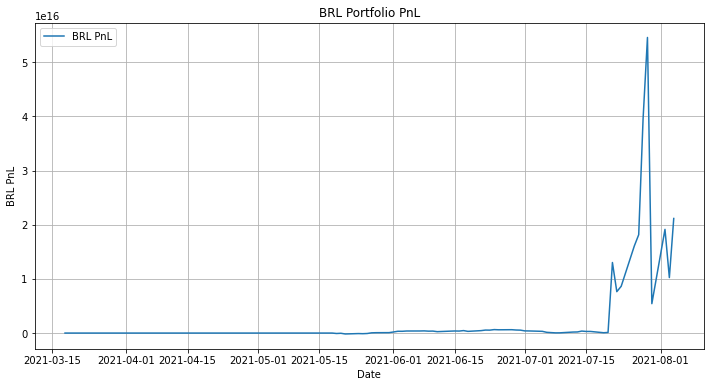

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(sumry_p.index.to_numpy()[:100], sumry_p["Total Nominal"].to_numpy()[:100], label="BRL PnL")
plt.xlabel("Date")
plt.ylabel("BRL PnL")
plt.title("BRL Portfolio PnL")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
##### test function Calc_Perfmce2
Sumry_P, Sumry_B, Sumry, Drift, Curncy_BD = Calc_Perfmce2(test_contracts, prtf='Custom')


C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_43076/1400965416.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33476461.887076084' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_43076/1400965416.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4119644.3566768654' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_43076/1400965416.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2562080.293597338' has dtype incompatible with int64, please explicitly cast to a compa

Shape of Sumry_P: (334, 10)
Shape of Sumry_B: (334, 10)
Shape of Sumry: (334, 10)
Shape of Drift: (16187, 8)
Shape of Curncy_BD: (334, 150)

Initial Capital: -443535207.14229786, Final Capital: -2.3918214637367476e+69


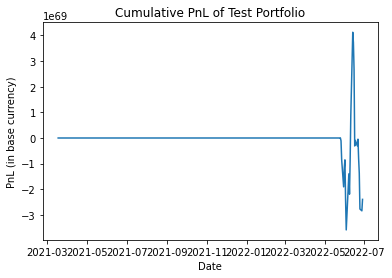

In [33]:
###############  test output Calc_Perfmce2
print("Shape of Sumry_P:", Sumry_P.shape)
print("Shape of Sumry_B:", Sumry_B.shape)
print("Shape of Sumry:", Sumry.shape)
print("Shape of Drift:", Drift.shape)
print("Shape of Curncy_BD:", Curncy_BD.shape)


initial_capital = Sumry['Nominal Capital'].iloc[0]
final_capital = Sumry['Nominal Capital'].iloc[-1]
print(f"\nInitial Capital: {initial_capital}, Final Capital: {final_capital}")

# (d) Plot performance (optional)
plt.plot(Sumry['Nominal Capital'])
plt.title('Cumulative PnL of Test Portfolio')
plt.xlabel('Date')
plt.ylabel('PnL (in base currency)')
plt.show()

In [15]:
def Calc_Perfmce2(Contrct, prtf='Custom', incl_RUB=True, incl_front=True):

    if not incl_RUB:
        Contrct[:] = [x for x in Contrct if x.PB != 'P' or x.curncy != 'RUB']
    if not incl_front:
        Contrct[:] = [x for x in Contrct if x.curncy not in ['EGP','UAH','EUR','JPY']]
    
    Sumry_P = pd.DataFrame(0,index=DF_C.index[1:],columns=['Close Fee','Spot Flow','Carry Flow','Open Fee','Spot MTM',
                                                  'Carry MTM'])
    Sumry_B = pd.DataFrame(0,index=DF_C.index[1:],columns=['Close Fee','Spot Flow','Carry Flow','Open Fee','Spot MTM',
                                                  'Carry MTM'])
    Sumry = pd.DataFrame(0,index=DF_C.index[1:],columns=['Close Fee','Spot Flow','Carry Flow','Open Fee','Capital'])
    Drift = pd.DataFrame(columns=['Date','Curncy','Target Size','Contrct Size','PB','Flow','MTM'])
    column_name = []
    for curncy in Curncy_List:
        column_name.append(curncy+' Spot MTM')
        column_name.append(curncy+' Carry MTM')
        column_name.append(curncy+' Spot Flow')
        column_name.append(curncy+' Carry Flow')
    Curncy_BD = pd.DataFrame(0,index=DF_C.index[1:],columns=column_name)
    
    dt = Incept_Dt
    for x in Contrct:
        if x.op_dt == dt:
            x.c_size = x.size*Init_Cap
            fee = abs(x.size)*Init_Cap*Transact_Cost(x.curncy,x.op_dt,x.stl_dt)
            x.op_f = fee
            v_sp,v_c = Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,dt,x.stl_dt)
            x.sp_fl = v_sp
            x.c_fl = v_c
            Drift.loc[Drift.shape[0]] = [dt,x.curncy,x.size,x.c_size,x.PB,-x.op_f,v_sp+v_c]
            try:
                Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
            except:
                Curncy_BD.loc[dt,x.curncy+' Spot MTM'] = v_sp
            try:
                Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
            except:
                Curncy_BD.loc[dt,x.curncy+' Carry MTM'] = v_c
            if x.PB == 'P':
                Sumry_P.loc[dt,'Open Fee'] += fee
                Sumry_P.loc[dt,'Spot MTM'] += v_sp
                Sumry_P.loc[dt,'Carry MTM'] += v_c
            else:
                Sumry_B.loc[dt,'Open Fee'] += fee
                Sumry_B.loc[dt,'Spot MTM'] += v_sp
                Sumry_B.loc[dt,'Carry MTM'] += v_c
    
    Sumry.loc[dt,'Open Fee'] = Sumry_P.loc[dt,'Open Fee'] + Sumry_B.loc[dt,'Open Fee']
    Sumry.loc[dt,'Capital'] = Init_Cap - Sumry.loc[dt,'Open Fee']

    prev_dt = dt
    for dt in Sumry.index[1:]:
        #NCLO = 0
        for x in Contrct:
            if dt == x.cl_dt:
                v_sp,v_c = Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,Sub_Bday(dt,1),x.stl_dt)
                x.sp_fl = v_sp
                x.c_fl = v_c
                if x.stat != 'Rolled':
                    fee = abs(x.c_size)*Transact_Cost(x.curncy,x.cl_dt,x.stl_dt)
                    x.cl_f = fee
                else:
                    fee = 0
                try:
                    Curncy_BD.loc[dt,x.curncy+' Spot Flow'] += v_sp
                except:
                    Curncy_BD.loc[dt,x.curncy+' Spot Flow'] = v_sp
                try:
                    Curncy_BD.loc[dt,x.curncy+' Carry Flow'] += v_c
                except:
                    Curncy_BD.loc[dt,x.curncy+' Carry Flow'] = v_c
                if x.PB == 'P':
                    Sumry_P.loc[dt,'Close Fee'] += fee
                    Sumry_P.loc[dt,'Spot Flow'] += v_sp
                    Sumry_P.loc[dt,'Carry Flow'] += v_c
                else:
                    Sumry_B.loc[dt,'Close Fee'] += fee
                    Sumry_B.loc[dt,'Spot Flow'] += v_sp
                    Sumry_B.loc[dt,'Carry Flow'] += v_c
            #elif (dt > x.op_dt and x.stat == 'Outstanding') or (dt > x.op_dt and dt < x.cl_dt):
                #NCLO += sum(Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,dt,x.stl_dt))
        
        Sumry.loc[dt,'Close Fee'] = Sumry_P.loc[dt,'Close Fee'] + Sumry_B.loc[dt,'Close Fee']
        Sumry.loc[dt,'Spot Flow'] = Sumry_P.loc[dt,'Spot Flow'] + Sumry_B.loc[dt,'Spot Flow']
        Sumry.loc[dt,'Carry Flow'] = Sumry_P.loc[dt,'Carry Flow'] + Sumry_B.loc[dt,'Carry Flow']
        NCLO = Sumry.loc[prev_dt,'Capital'] + Sumry_P.loc[prev_dt,'Spot MTM'] + \
            Sumry_P.loc[prev_dt,'Carry MTM'] + Sumry_B.loc[prev_dt,'Spot MTM'] + \
            Sumry_B.loc[prev_dt,'Carry MTM'] - Sumry.loc[dt,'Close Fee']

        rolling = False
        for x in Contrct:
            if dt == x.op_dt:
                x.c_size = x.size*NCLO
                if not rolling:
                    f_op = Transact_Cost(x.curncy,dt,x.stl_dt)
                else:
                    f_op = INFO.loc[x.curncy,'ROLL']/P_SPOT.loc[Sub_Bday(dt,1),x.curncy]/2
                fee = abs(x.c_size)*f_op
                x.op_f = fee
                Drift.loc[Drift.shape[0]] = [dt,x.curncy,x.size,x.c_size,x.PB,-x.op_f,0]
                if x.PB == 'P':
                    Sumry_P.loc[dt,'Open Fee'] += fee
                else:
                    Sumry_B.loc[dt,'Open Fee'] += fee
            if dt >= x.op_dt and (x.stat == 'Outstanding' or dt < x.cl_dt):
                v_sp,v_c = Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,dt,x.stl_dt)
                x.sp_fl = v_sp
                x.c_fl = v_c
                if dt == x.op_dt:
                    ind = Drift.index[(Drift['Date']==dt) & (Drift['Curncy']==x.curncy) 
                                      & (Drift['PB']==x.PB) & (Drift['Target Size']==x.size)].tolist()
                    Drift.loc[ind,'MTM'] = v_sp + v_c
                else:
                    ind = Drift.index[(Drift['Date']==prev_dt) & 
                                      (Drift['Curncy']==x.curncy) & 
                                      (Drift['PB']==x.PB)].tolist()[0]
                    prev_fl = Drift['Flow'][ind]
                    Drift.loc[Drift.shape[0]] = [dt,x.curncy,x.size,x.c_size,x.PB,prev_fl,v_sp+v_c]
                try:
                    Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
                except:
                    Curncy_BD.loc[dt,x.curncy+' Spot MTM'] = v_sp
                try:
                    Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
                except:
                    Curncy_BD.loc[dt,x.curncy+' Carry MTM'] = v_c
                if x.PB == 'P':
                    Sumry_P.loc[dt,'Spot MTM'] += v_sp
                    Sumry_P.loc[dt,'Carry MTM'] += v_c
                else:
                    Sumry_B.loc[dt,'Spot MTM'] += v_sp
                    Sumry_B.loc[dt,'Carry MTM'] += v_c
            rolling = False
            if x.stat == 'Rolled':
                rolling = True
        Sumry.loc[dt,'Open Fee'] = Sumry_P.loc[dt,'Open Fee'] + Sumry_B.loc[dt,'Open Fee']
        Sumry.loc[dt,'Capital'] = Sumry.loc[prev_dt,'Capital'] - Sumry.loc[dt,'Close Fee'] +\
            Sumry.loc[dt,'Spot Flow'] + Sumry.loc[dt,'Carry Flow'] - Sumry.loc[dt,'Open Fee']
        prev_dt = dt
        
    Sumry_P['Nominal Spot'] = Sumry_P['Spot MTM'] + np.cumsum(Sumry_P['Spot Flow'])
    Sumry_P['Nominal Carry'] = Sumry_P['Carry MTM'] + np.cumsum(Sumry_P['Carry Flow'])
    Sumry_P['Total Flow'] = np.cumsum(Sumry_P['Spot Flow']+Sumry_P['Carry Flow']-\
                                      Sumry_P['Open Fee']-Sumry_P['Close Fee'])
    Sumry_P['Total Nominal'] = Sumry_P['Total Flow'] + Sumry_P['Spot MTM'] + Sumry_P['Carry MTM']
    
    Sumry_B['Nominal Spot'] = Sumry_B['Spot MTM'] + np.cumsum(Sumry_B['Spot Flow'])
    Sumry_B['Nominal Carry'] = Sumry_B['Carry MTM'] + np.cumsum(Sumry_B['Carry Flow'])
    Sumry_B['Total Flow'] = np.cumsum(Sumry_B['Spot Flow']+Sumry_B['Carry Flow']-\
                                      Sumry_B['Open Fee']-Sumry_B['Close Fee'])
    Sumry_B['Total Nominal'] = Sumry_B['Total Flow'] + Sumry_B['Spot MTM'] + Sumry_B['Carry MTM']
    Sumry['Spot MTM'] = Sumry_P['Spot MTM'] + Sumry_B['Spot MTM']
    Sumry['Carry MTM'] = Sumry_P['Carry MTM'] + Sumry_B['Carry MTM']
    Sumry['Nominal Spot'] = Sumry_P['Nominal Spot'] + Sumry_B['Nominal Spot']
    Sumry['Nominal Carry'] = Sumry_P['Nominal Carry'] + Sumry_B['Nominal Carry']
    Sumry['Nominal Capital'] = Sumry['Capital'] + Sumry['Spot MTM'] + Sumry['Carry MTM']
    
    Drift['Nominal Capital'] = Sumry['Nominal Capital'][Drift['Date']].tolist()
    Drift['Actual Size'] = ((Drift['Contrct Size'] + Drift['Flow'] + Drift['MTM'])/Drift['Nominal Capital']).tolist()
    Drift = Drift.set_index(['Date'])
    
    for curncy in Curncy_List:
        Curncy_BD[curncy+' Nominal Spot'] = Curncy_BD[curncy+' Spot MTM'] + np.cumsum(Curncy_BD[curncy+' Spot Flow'])
        Curncy_BD[curncy+' Nominal Carry'] = Curncy_BD[curncy+' Carry MTM'] + np.cumsum(Curncy_BD[curncy+' Carry Flow'])
        Curncy_BD.drop(columns=curncy+' Spot MTM')
        Curncy_BD.drop(columns=curncy+' Carry MTM')
        Curncy_BD.drop(columns=curncy+' Spot Flow')
        Curncy_BD.drop(columns=curncy+' Carry Flow')
    
    return Sumry_P, Sumry_B, Sumry, Drift, Curncy_BD

It creates columns in Curncy_BD to track spot MTM, carry MTM, spot flow, and carry flow for each currency in Curncy_List.
It iterates through contracts with an opening date (op_dt) equal to the initial date (Incept_Dt).
It calculates contract size in nominal terms (c_size) based on initial capital (Init_Cap).
It calculates opening fees (op_f) using the Transact_Cost function.
It calculates spot and carry flows (sp_fl, c_fl) using the Contrct_Value function.
It updates Drift, Curncy_BD, Sumry_P, and Sumry_B DataFrames with relevant information.
It iterates through dates in the Sumry DataFrame index (starting from the second date).


For each date, it iterates through contracts that are closing (cl_dt equal to the current date) or outstanding.
It calculates spot and carry flows (sp_fl, c_fl) using Contrct_Value.
It calculates closing fees (cl_f) if the contract is not rolled over.
It updates Curncy_BD, Sumry_P, and Sumry_B with flow and fee information.

Calculating Capital and Opening New Contracts:
It calculates the net capital (NCLO) based on the previous day's capital, MTM values, and fees.
It iterates through contracts that are opening (op_dt equal to the current date).
It calculates contract size in nominal terms (c_size) based on NCLO.
It calculates opening fees (op_f) using Transact_Cost or a rolling fee from INFO.
It updates Drift, Sumry_P, and Sumry_B with opening fee information.

Calculating MTM and Updating Drift:
It iterates through contracts that are outstanding or opening on the current date.
It calculates spot and carry MTM values (v_sp, v_c) using Contrct_Value.
It updates Drift, Curncy_BD, Sumry_P, and Sumry_B with MTM information.


Updating Capital and Summary DataFrames:
It updates Sumry with opening fees, capital, and nominal values.
It updates Sumry_P and Sumry_B with nominal spot, nominal carry, total flow, and total nominal values.


Calculating Actual Size and Updating Drift:
It calculates the actual size of contracts in Drift based on contract size, flow, MTM, and nominal capital.
Updating Currency Breakdown:
It updates Curncy_BD with nominal spot and nominal carry values for each currency.
Returning Performance Data:
It returns the Sumry_P, Sumry_B, Sumry, Drift, and Curncy_BD DataFrames, providing a comprehensive performance overview.

In [63]:

def Calc_Perfmce (Contrct,prtf='B',incl_bmk=True,incl_RUB=True,incl_front=True):

    if not incl_bmk:
        Contrct[:] = [x for x in Contrct if x.PB != 'B']
    if not incl_RUB:
        Contrct[:] = [x for x in Contrct if x.PB != 'P' or x.curncy != 'RUB']
    if not incl_front:
        Contrct[:] = [x for x in Contrct if x.curncy not in ['EGP','UAH','EUR','JPY']]
    
    Sumry_P = pd.DataFrame(0,index=DF_C.index[1:],columns=['Close Fee','Spot Flow','Carry Flow','Open Fee','Spot MTM',
                                                  'Carry MTM'])
    Sumry_B = pd.DataFrame(0,index=DF_C.index[1:],columns=['Close Fee','Spot Flow','Carry Flow','Open Fee','Spot MTM',
                                                  'Carry MTM'])
    Sumry = pd.DataFrame(0,index=DF_C.index[1:],columns=['Close Fee','Spot Flow','Carry Flow','Open Fee','Capital'])
    Drift = pd.DataFrame(columns=['Date','Curncy','Target Size','Contrct Size','PB','Flow','MTM'])
    column_name = []
    for curncy in Curncy_List:
        column_name.append(curncy+' Spot MTM')
        column_name.append(curncy+' Carry MTM')
        column_name.append(curncy+' Spot Flow')
        column_name.append(curncy+' Carry Flow')
    Curncy_BD = pd.DataFrame(0,index=DF_C.index[1:],columns=column_name)
    
    dt = Incept_Dt
    for x in Contrct:
        if x.op_dt == dt:
            x.c_size = x.size*Init_Cap
            fee = abs(x.size)*Init_Cap*Transact_Cost(x.curncy,x.op_dt,x.stl_dt)
            x.op_f = fee
            v_sp,v_c = Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,dt,x.stl_dt)
            x.sp_fl = v_sp
            x.c_fl = v_c
            Drift.loc[Drift.shape[0]] = [dt,x.curncy,x.size,x.c_size,x.PB,-x.op_f,v_sp+v_c]
            try:
                Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
            except:
                Curncy_BD.loc[dt,x.curncy+' Spot MTM'] = v_sp
            try:
                Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
            except:
                Curncy_BD.loc[dt,x.curncy+' Carry MTM'] = v_c
            if x.PB == 'P':
                Sumry_P.loc[dt,'Open Fee'] += fee
                Sumry_P.loc[dt,'Spot MTM'] += v_sp
                Sumry_P.loc[dt,'Carry MTM'] += v_c
            else:
                Sumry_B.loc[dt,'Open Fee'] += fee
                Sumry_B.loc[dt,'Spot MTM'] += v_sp
                Sumry_B.loc[dt,'Carry MTM'] += v_c
    
    Sumry.loc[dt,'Open Fee'] = Sumry_P.loc[dt,'Open Fee'] + Sumry_B.loc[dt,'Open Fee']
    Sumry.loc[dt,'Capital'] = Init_Cap - Sumry.loc[dt,'Open Fee']

    prev_dt = dt
    for dt in Sumry.index[1:]:
        #NCLO = 0
        for x in Contrct:
            if dt == x.cl_dt:
                v_sp,v_c = Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,Sub_Bday(dt,1),x.stl_dt)
                x.sp_fl = v_sp
                x.c_fl = v_c
                if x.stat != 'Rolled':
                    fee = abs(x.c_size)*Transact_Cost(x.curncy,x.cl_dt,x.stl_dt)
                    x.cl_f = fee
                else:
                    fee = 0
                try:
                    Curncy_BD.loc[dt,x.curncy+' Spot Flow'] += v_sp
                except:
                    Curncy_BD.loc[dt,x.curncy+' Spot Flow'] = v_sp
                try:
                    Curncy_BD.loc[dt,x.curncy+' Carry Flow'] += v_c
                except:
                    Curncy_BD.loc[dt,x.curncy+' Carry Flow'] = v_c
                if x.PB == 'P':
                    Sumry_P.loc[dt,'Close Fee'] += fee
                    Sumry_P.loc[dt,'Spot Flow'] += v_sp
                    Sumry_P.loc[dt,'Carry Flow'] += v_c
                else:
                    Sumry_B.loc[dt,'Close Fee'] += fee
                    Sumry_B.loc[dt,'Spot Flow'] += v_sp
                    Sumry_B.loc[dt,'Carry Flow'] += v_c
            #elif (dt > x.op_dt and x.stat == 'Outstanding') or (dt > x.op_dt and dt < x.cl_dt):
                #NCLO += sum(Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,dt,x.stl_dt))
        
        Sumry.loc[dt,'Close Fee'] = Sumry_P.loc[dt,'Close Fee'] + Sumry_B.loc[dt,'Close Fee']
        Sumry.loc[dt,'Spot Flow'] = Sumry_P.loc[dt,'Spot Flow'] + Sumry_B.loc[dt,'Spot Flow']
        Sumry.loc[dt,'Carry Flow'] = Sumry_P.loc[dt,'Carry Flow'] + Sumry_B.loc[dt,'Carry Flow']
        NCLO = Sumry.loc[prev_dt,'Capital'] + Sumry_P.loc[prev_dt,'Spot MTM'] + \
            Sumry_P.loc[prev_dt,'Carry MTM'] + Sumry_B.loc[prev_dt,'Spot MTM'] + \
            Sumry_B.loc[prev_dt,'Carry MTM'] - Sumry.loc[dt,'Close Fee']

        rolling = False
        for x in Contrct:
            if dt == x.op_dt:
                x.c_size = x.size*NCLO
                if not rolling:
                    f_op = Transact_Cost(x.curncy,dt,x.stl_dt)
                else:
                    f_op = INFO.loc[x.curncy,'ROLL']/P_SPOT.loc[Sub_Bday(dt,1),x.curncy]/2
                fee = abs(x.c_size)*f_op
                x.op_f = fee
                Drift.loc[Drift.shape[0]] = [dt,x.curncy,x.size,x.c_size,x.PB,-x.op_f,0]
                if x.PB == 'P':
                    Sumry_P.loc[dt,'Open Fee'] += fee
                else:
                    Sumry_B.loc[dt,'Open Fee'] += fee
            if dt >= x.op_dt and (x.stat == 'Outstanding' or dt < x.cl_dt):
                v_sp,v_c = Contrct_Value(prtf,x.curncy,x.PB,x.op_sp,x.op_fwd,x.c_size,dt,x.stl_dt)
                x.sp_fl = v_sp
                x.c_fl = v_c
                if dt == x.op_dt:
                    ind = Drift.index[(Drift['Date']==dt) & (Drift['Curncy']==x.curncy) 
                                      & (Drift['PB']==x.PB) & (Drift['Target Size']==x.size)].tolist()
                    Drift.loc[ind,'MTM'] = v_sp + v_c
                else:
                    ind = Drift.index[(Drift['Date']==prev_dt) & 
                                      (Drift['Curncy']==x.curncy) & 
                                      (Drift['PB']==x.PB)].tolist()[0]
                    prev_fl = Drift['Flow'][ind]
                    Drift.loc[Drift.shape[0]] = [dt,x.curncy,x.size,x.c_size,x.PB,prev_fl,v_sp+v_c]
                try:
                    Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
                except:
                    Curncy_BD.loc[dt,x.curncy+' Spot MTM'] = v_sp
                try:
                    Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
                except:
                    Curncy_BD.loc[dt,x.curncy+' Carry MTM'] = v_c
                if x.PB == 'P':
                    Sumry_P.loc[dt,'Spot MTM'] += v_sp
                    Sumry_P.loc[dt,'Carry MTM'] += v_c
                else:
                    Sumry_B.loc[dt,'Spot MTM'] += v_sp
                    Sumry_B.loc[dt,'Carry MTM'] += v_c
            rolling = False
            if x.stat == 'Rolled':
                rolling = True
        Sumry.loc[dt,'Open Fee'] = Sumry_P.loc[dt,'Open Fee'] + Sumry_B.loc[dt,'Open Fee']
        Sumry.loc[dt,'Capital'] = Sumry.loc[prev_dt,'Capital'] - Sumry.loc[dt,'Close Fee'] +\
            Sumry.loc[dt,'Spot Flow'] + Sumry.loc[dt,'Carry Flow'] - Sumry.loc[dt,'Open Fee']
        prev_dt = dt
        
    Sumry_P['Nominal Spot'] = Sumry_P['Spot MTM'] + np.cumsum(Sumry_P['Spot Flow'])
    Sumry_P['Nominal Carry'] = Sumry_P['Carry MTM'] + np.cumsum(Sumry_P['Carry Flow'])
    Sumry_P['Total Flow'] = np.cumsum(Sumry_P['Spot Flow']+Sumry_P['Carry Flow']-\
                                      Sumry_P['Open Fee']-Sumry_P['Close Fee'])
    Sumry_P['Total Nominal'] = Sumry_P['Total Flow'] + Sumry_P['Spot MTM'] + Sumry_P['Carry MTM']
    
    Sumry_B['Nominal Spot'] = Sumry_B['Spot MTM'] + np.cumsum(Sumry_B['Spot Flow'])
    Sumry_B['Nominal Carry'] = Sumry_B['Carry MTM'] + np.cumsum(Sumry_B['Carry Flow'])
    Sumry_B['Total Flow'] = np.cumsum(Sumry_B['Spot Flow']+Sumry_B['Carry Flow']-\
                                      Sumry_B['Open Fee']-Sumry_B['Close Fee'])
    Sumry_B['Total Nominal'] = Sumry_B['Total Flow'] + Sumry_B['Spot MTM'] + Sumry_B['Carry MTM']
    Sumry['Spot MTM'] = Sumry_P['Spot MTM'] + Sumry_B['Spot MTM']
    Sumry['Carry MTM'] = Sumry_P['Carry MTM'] + Sumry_B['Carry MTM']
    Sumry['Nominal Spot'] = Sumry_P['Nominal Spot'] + Sumry_B['Nominal Spot']
    Sumry['Nominal Carry'] = Sumry_P['Nominal Carry'] + Sumry_B['Nominal Carry']
    Sumry['Nominal Capital'] = Sumry['Capital'] + Sumry['Spot MTM'] + Sumry['Carry MTM']
    
    Drift['Nominal Capital'] = Sumry['Nominal Capital'][Drift['Date']].tolist()
    Drift['Actual Size'] = ((Drift['Contrct Size'] + Drift['Flow'] + Drift['MTM'])/Drift['Nominal Capital']).tolist()
    Drift = Drift.set_index(['Date'])
    
    for curncy in Curncy_List:
        Curncy_BD[curncy+' Nominal Spot'] = Curncy_BD[curncy+' Spot MTM'] + np.cumsum(Curncy_BD[curncy+' Spot Flow'])
        Curncy_BD[curncy+' Nominal Carry'] = Curncy_BD[curncy+' Carry MTM'] + np.cumsum(Curncy_BD[curncy+' Carry Flow'])
        Curncy_BD.drop(columns=curncy+' Spot MTM')
        Curncy_BD.drop(columns=curncy+' Carry MTM')
        Curncy_BD.drop(columns=curncy+' Spot Flow')
        Curncy_BD.drop(columns=curncy+' Carry Flow')
    
    return Sumry_P, Sumry_B, Sumry, Drift, Curncy_BD

In [70]:
def Print_Contrct_List(curncy='All',prtf='A'):
    
    Contrct_List = globals()['Contrct_'+prtf]
    if curncy == 'All':
        print(f"{'Curncy':<8}{'Prtf':<5}{'OpenDate':<12}{'CloseDate':<12}{'SettleDate':<12}"
            f"{'Size':<8}{'OpenSpot':<10}{'OpenFwd':<10}{'CSize':<12}{'Status':<12}"
            f"{'SpotFlow':<10}{'CarryFlow':<10}\n")
        for x in Contrct_List:
            print(f"{x.curncy:<8}{x.PB:<5}{str(x.op_dt):<12}{str(x.cl_dt):<12}{str(x.stl_dt):<12}"
                f"{x.size:<8.2%}{x.op_sp:<10.4f}{x.op_fwd:<10.6f}{x.c_size:<12.0f}{x.stat:<12}"
                f"{x.sp_fl:<10.0f}{x.c_fl:<10.0f}\n")
    elif curncy in Curncy_List:
        print(f"{'Curncy':<8}{'Prtf':<5}{'OpenDate':<12}{'CloseDate':<12}{'SettleDate':<12}"
            f"{'Size':<8}{'OpenSpot':<10}{'OpenFwd':<10}{'CSize':<12}{'Status':<12}"
            f"{'SpotFlow':<10}{'CarryFlow':<10}\n")
        for x in Contrct_List:
            if x.curncy == curncy:
                print(f"{x.curncy:<8}{x.PB:<5}{str(x.op_dt):<12}{str(x.cl_dt):<12}{str(x.stl_dt):<12}"
                    f"{x.size:<8.2%}{x.op_sp:<10.2f}{x.op_fwd:<10.2f}{x.c_size:<12.0f}{x.stat:<12}"
                    f"{x.sp_fl:<10.0f}{x.c_fl:<10.0f}\n")
    return

In [100]:
##### other test prints 
def Print_Contrct_List2(curncy='All', prtf='A'):
    Contrct_List = globals()['Contrct_' + prtf]

    if curncy == 'All':
        print(f"{'Curncy':<8}{'Prtf':<5}{'OpenDate':<12}{'CloseDate':<12}{'SettleDate':<12}"
              f"{'Size':<10}{'OpenSpot':<10}{'OpenFwd':<12}{'CSize':<12}{'Status':<12}"
              f"{'SpotFlow':<12}{'CarryFlow':<12}{'Total MTM':<12}{'P/L':<12}\n")
        for x in Contrct_List:
            total_mtm = x.sp_fl + x.c_fl
            pl = total_mtm - x.op_f - x.cl_f  # Assuming op_f and cl_f are available
            print(f"{x.curncy:<8}{x.PB:<5}{str(x.op_dt):<12}{str(x.cl_dt):<12}{str(x.stl_dt):<12}"
                  f"{x.size:<10.2%}{x.op_sp:<10.4f}{x.op_fwd:<12.6f}{x.c_size:<12.0f}{x.stat:<12}"
                  f"{x.sp_fl:<12.0f}{x.c_fl:<12.0f}{total_mtm:<12.0f}{pl:<12.0f}\n")
            print("-" * 120)  # Separator
    # ... (Similar logic for filtering by currency)

    # Add summary statistics here (e.g., total P/L by currency)

    return

In [68]:
Contrct_A = Constrct_Ct(prtf='A')
#Contrct_B = Constrct_Ct(prtf='B')
Contrct_M = Constrct_Ct(prtf='M')
Sumry_AP,Sumry_AB,Sumry_A,_,_ = Calc_Perfmce (Contrct_A,prtf='A',incl_bmk=True)
#_,_,Sumry_B,_,_ = Calc_Perfmce (Contrct_B,prtf='B')
Sumry_MP,Sumry_MB,Sumry_M,_,_ = Calc_Perfmce (Contrct_M,prtf='M',incl_bmk=True)

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compati

In [71]:
Print_Contrct_List(curncy='All',prtf='M')

Curncy  Prtf OpenDate    CloseDate   SettleDate  Size    OpenSpot  OpenFwd   CSize       Status      SpotFlow  CarryFlow 

BRL     P    2021-03-18  2021-04-01  2021-06-22  2.16%   5.5879    0.026727  2162527     Closed      -17771    -1288     

BRL     P    2021-04-01  2021-05-03  2021-07-06  -1.53%  5.6345    0.037040  -1509301    Closed      -54212    -2381     

BRL     P    2021-05-03  2021-06-30  2021-08-05  1.56%   5.4381    0.044346  1563940     Closed      151433    8692      

BRL     P    2021-06-01  2021-06-30  2021-08-05  0.85%   5.2191    0.030382  865482      Closed      45700     2380      

BRL     P    2021-06-30  2021-09-01  2021-10-04  2.41%   4.9566    0.056756  2429503     Closed      -91475    17337     

BRL     P    2021-08-02  2021-09-01  2021-10-04  -0.87%  5.2115    0.039551  -872927     Closed      -10179    -3325     

BRL     P    2021-09-01  2021-10-01  2021-12-03  1.54%   5.1513    0.073294  1556754     Closed      -82669    6064      

BRL     P    202

In [37]:
def Perfermance_Analysis(incl_bmk=True,incl_RUB=True,incl_front=True,new_size=False):
    
    plt.style.use('seaborn-dark')
    wbn = ('B' if incl_bmk else '') + ('R' if incl_RUB else '') + ('F' if incl_front else '')
    if new_size:
        wbn = 'Portfolio Performance RUB ' + wbn + '.xlsx'
    else:
        wbn = 'Portfolio Performance ' + wbn + '.xlsx'
    if incl_bmk:
        Contrct_A = Constrct_Ct(prtf='A')
        Contrct_B = Constrct_Ct(prtf='B')
        Contrct_M = Constrct_Ct(prtf='M')
        Sumry_AP, Sumry_AB, Sumry_A, Drift_A, Curncy_BD_A = Calc_Perfmce (Contrct_A,'A',incl_bmk,incl_RUB)
        _, _, Sumry_B, Drift_B, Curncy_BD_B = Calc_Perfmce (Contrct_B,'B')
        Sumry_MP, Sumry_MB, Sumry_M, Drift_M, Curncy_BD_M = Calc_Perfmce (Contrct_M,'M',incl_bmk,incl_RUB,incl_front)
        prev_dt = Sumry_A.index[0]
        Y_EDt = []
        for dt in Sumry_A.index[1:]:
            if prev_dt.year != dt.year:
                Y_EDt.append(prev_dt)
            prev_dt = dt
        Alpha_A = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Alpha','Carry Alpha','Daily Alpha',
                                                             'Alpha','Actual Alpha','YTD Alpha',
                                                             'Daily Alpha LF','Alpha LF','YTD Alpha LF'])
        Alpha_M = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Alpha','Carry Alpha','Daily Alpha',
                                                             'Alpha','Actual Alpha','YTD Alpha',
                                                             'Daily Alpha LF','Alpha LF','YTD Alpha LF'])
        Alpha_A['Spot Alpha'] = (Sumry_A['Nominal Spot'] - Sumry_B['Nominal Spot'])/Init_Cap*10**4
        Alpha_A['Carry Alpha'] = (Sumry_A['Nominal Carry'] - Sumry_B['Nominal Carry'])/Init_Cap*10**4
        Alpha_A['Alpha'] = (Sumry_A['Nominal Capital'] - Sumry_B['Nominal Capital'])/Init_Cap*10**4
        Alpha_A['Daily Alpha'] = Alpha_A['Alpha']
        Alpha_A.loc[Alpha_A.index[1]:,'Daily Alpha'] -= Alpha_A['Daily Alpha'].shift(1)
        Alpha_A['Actual Alpha'] = (Sumry_A['Capital'] - Sumry_B['Capital'])/Init_Cap*10**4
        Alpha_A['Alpha LF'] = (Sumry_A['Nominal Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                               np.cumsum(Sumry_A['Open Fee']) - Sumry_B['Nominal Capital'] -\
                               np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_A['Daily Alpha LF'] = Alpha_A['Alpha LF']
        Alpha_A.loc[Alpha_A.index[1]:,'Daily Alpha LF'] -= Alpha_A['Daily Alpha LF'].shift(1)
        Alpha_A['Actual Alpha LF'] = (Sumry_A['Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                                      np.cumsum(Sumry_A['Open Fee']) - Sumry_B['Capital'] -\
                                      np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_A['YTD Alpha'] = Alpha_A['Alpha']
        Alpha_A['YTD Alpha LF'] = Alpha_A['Alpha LF']
        for y_edt in Y_EDt:
            y_e_alp = Alpha_A.loc[y_edt,'YTD Alpha']
            y_e_alplf = Alpha_A.loc[y_edt,'YTD Alpha LF']
            for dt in Alpha_A.index:
                if dt.year == y_edt.year+1:
                    Alpha_A.loc[dt,'YTD Alpha'] -= y_e_alp
                    Alpha_A.loc[dt,'YTD Alpha LF'] -= y_e_alplf
        
        Alpha_M['Spot Alpha'] = (Sumry_M['Nominal Spot'] - Sumry_B['Nominal Spot'])/Init_Cap*10**4
        Alpha_M['Carry Alpha'] = (Sumry_M['Nominal Carry'] - Sumry_B['Nominal Carry'])/Init_Cap*10**4
        Alpha_M['Alpha'] = (Sumry_M['Nominal Capital'] - Sumry_B['Nominal Capital'])/Init_Cap*10**4
        Alpha_M['Daily Alpha'] = Alpha_M['Alpha']
        Alpha_M.loc[Alpha_M.index[1]:,'Daily Alpha'] -= Alpha_M['Daily Alpha'].shift(1)
        Alpha_M['Actual Alpha'] = (Sumry_M['Capital'] - Sumry_B['Capital'])/Init_Cap*10**4
        Alpha_M['Alpha LF'] = (Sumry_M['Nominal Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                               np.cumsum(Sumry_M['Open Fee']) - Sumry_B['Nominal Capital'] -\
                               np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_M['Daily Alpha LF'] = Alpha_M['Alpha LF']
        Alpha_M.loc[Alpha_M.index[1]:,'Daily Alpha LF'] -= Alpha_M['Daily Alpha LF'].shift(1)
        Alpha_M['Actual Alpha LF'] = (Sumry_M['Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                                      np.cumsum(Sumry_M['Open Fee']) - Sumry_B['Capital'] -\
                                      np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_M['YTD Alpha'] = Alpha_M['Alpha']
        Alpha_M['YTD Alpha LF'] = Alpha_M['Alpha LF']
        for y_edt in Y_EDt:
            y_e_alp = Alpha_M.loc[y_edt,'YTD Alpha']
            y_e_alplf = Alpha_M.loc[y_edt,'YTD Alpha LF']
            for dt in Alpha_M.index:
                if dt.year == y_edt.year+1:
                    Alpha_M.loc[dt,'YTD Alpha'] -= y_e_alp
                    Alpha_M.loc[dt,'YTD Alpha LF'] -= y_e_alplf
        
        fig,ax = plt.subplots(3,figsize=(20,15))
        ax[0].plot(Alpha_A.index.to_numpy(), Alpha_A['Spot Alpha'], label = 'Spot Alpha') 
        ax[0].plot(Alpha_A.index,Alpha_A['Carry Alpha'],label = 'Carry Alpha')
        ax[0].plot(Alpha_A.index,Alpha_A['Alpha'],label = 'Total Alpha')
        ax[0].plot(Alpha_A.index,Alpha_A['Alpha LF'],label = 'Total Alpha Less Fee')
        ax[0].set_title('Analyst Alpha')
        ax[0].legend()
        ax[1].plot(Alpha_A.index,Alpha_M['Spot Alpha'],label = 'Spot Alpha')
        ax[1].plot(Alpha_A.index,Alpha_M['Carry Alpha'],label = 'Carry Alpha')
        ax[1].plot(Alpha_A.index,Alpha_M['Alpha'],label = 'Total Alpha')
        ax[1].plot(Alpha_A.index,Alpha_M['Alpha LF'],label = 'Total Alpha Less Fee')
        ax[1].set_title('Model Alpha')
        ax[1].legend()
        ax[2].plot(Alpha_A.index,Alpha_A['Alpha'],label = 'Analyst Alpha')
        ax[2].plot(Alpha_A.index,Alpha_A['Alpha LF'],label = 'Analyst Alpha Less Fee')
        ax[2].plot(Alpha_A.index,Alpha_M['Alpha'],label = 'Model Alpha')
        ax[2].plot(Alpha_A.index,Alpha_M['Alpha LF'],label = 'Model Alpha Less Fee')
        ax[2].set_title('Comparison')
        ax[2].legend()
        
        for dt in Y_EDt:
            print(f"The YTD alpha of analyst's portfolio of year {dt.year} is {Alpha_A.loc[dt,'YTD Alpha']:.2f}"
                f", without fee is {Alpha_A.loc[dt,'YTD Alpha LF']:.2f}")
        print(f"The YTD alpha of analyst's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Alpha_A.loc[Alpha_A.index[-1],'YTD Alpha']:.2f}"
              f", without fee is {Alpha_A.loc[Alpha_A.index[-1],'YTD Alpha LF']:.2f}")
        print(f"The alpha of analyst's portfolio is {Alpha_A.loc[Alpha_A.index[-1],'Alpha']:.2f}"
              f", without fee is {Alpha_A.loc[Alpha_A.index[-1],'Alpha LF']:.2f}")
        print(f"The tracking error of analyst's portfolio is {np.std(Alpha_A['Daily Alpha'])*np.sqrt(261):.2f}"
              f", without fee is {np.std(Alpha_A['Daily Alpha LF'])*np.sqrt(261):.2f}")
        print(f"The infomation ratio of analyst's portfolio is "
              f"{Alpha_A.loc[Alpha_A.index[-1],'Alpha']/np.std(Alpha_A['Daily Alpha'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Alpha_A.loc[Alpha_A.index[-1],'Alpha LF']/np.std(Alpha_A['Daily Alpha LF'])/np.sqrt(261):.2f}")
        for dt in Y_EDt:
            print(f"The YTD alpha of model's portfolio of year {dt.year} is {Alpha_M.loc[dt,'YTD Alpha']:.2f}"
                  f", without fee is {Alpha_M.loc[dt,'YTD Alpha LF']:.2f}")
        print(f"The YTD alpha of model's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Alpha_M.loc[Alpha_M.index[-1],'YTD Alpha']:.2f}"
              f", without fee is {Alpha_M.loc[Alpha_M.index[-1],'YTD Alpha LF']:.2f}")
        print(f"The alpha of model's portfolio is {Alpha_M.loc[Alpha_M.index[-1],'Alpha']:.2f}"
              f", without fee is {Alpha_M.loc[Alpha_M.index[-1],'Alpha LF']:.2f}")
        print(f"The tracking error of model's portfolio is {np.std(Alpha_M['Daily Alpha'])*np.sqrt(261):.2f}"
              f", without fee is {np.std(Alpha_M['Daily Alpha LF'])*np.sqrt(261):.2f}")
        print(f"The infomation ratio of model's portfolio is "
              f"{Alpha_M.loc[Alpha_M.index[-1],'Alpha']/np.std(Alpha_M['Daily Alpha'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Alpha_M.loc[Alpha_M.index[-1],'Alpha LF']/np.std(Alpha_M['Daily Alpha LF'])/np.sqrt(261):.2f}")
        
        col_name = ['Curncy','PB','OpenDate','CloeDate','SettleDate','Size','OpenSpot','OpenForward',
                    'ContrctSize','Status','SpotFlow','CarryFlow','OpenFee','CloseFee','Portfolio']
        Contrct_L = []
        for x in Contrct_A:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Analyst']
            Contrct_L.append(contrct)       
        for x in Contrct_B:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Benchmark']
            Contrct_L.append(contrct)       
        for x in Contrct_M:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Model']
            Contrct_L.append(contrct)       
        Contrct_DF = pd.DataFrame(Contrct_L,columns=col_name)
        
        col_name = []
        for name in Alpha_A:
            col_name.append('Analyst ' + name)
        for name in Alpha_A:
            col_name.append('Model ' + name)
        
        Alpha_DF = pd.concat([Alpha_A,Alpha_M],axis=1)
        Alpha_DF.columns = col_name
        
        cumsum = ['Close Fee','Spot Flow','Carry Flow','Open Fee']
        for name in cumsum:
            Sumry_AP[name] = np.cumsum(Sumry_AP[name])
            Sumry_AB[name] = np.cumsum(Sumry_AB[name])
            Sumry_MP[name] = np.cumsum(Sumry_MP[name])
            Sumry_MB[name] = np.cumsum(Sumry_MB[name])
            Sumry_B[name] = np.cumsum(Sumry_B[name])
        col_name = []
        for name in Sumry_AP:
            col_name.append('Analyst ' + name)
        Sumry_AP.columns = col_name
        Sumry_AB.columns = col_name
        col_name = []
        for name in Sumry_MP:
            col_name.append('Model ' + name)
        Sumry_MP.columns = col_name
        Sumry_MB.columns = col_name
        col_name = []
        for name in Sumry_B:
            col_name.append('Benchmark ' + name)
        Sumry_B.columns = col_name
        Sumry_AP['PB'] = 'P'
        Sumry_AB['PB'] = 'B'
        Sumry_MP['PB'] = 'P'
        Sumry_MB['PB'] = 'B'
        Sumry_B['PB'] = 'B'
        
        Sumry_DF = pd.concat([Sumry_AP,Sumry_AB,Sumry_MP,Sumry_MB,Sumry_B])
        
        Drift_A['Portfolio'] = 'Analyst'
        Drift_B['Portfolio'] = 'Benchmark'
        Drift_M['Portfolio'] = 'Model'
        
        Drift_DF = pd.concat([Drift_A,Drift_B,Drift_M])
        
        Alpha_BD_A = pd.DataFrame(index=Sumry_A.index)
        Alpha_BD_M = pd.DataFrame(index=Sumry_A.index)
        for curncy in Curncy_List:
            Alpha_BD_A[curncy+' Spot Alpha'] = (Curncy_BD_A[curncy+' Nominal Spot'] - 
                                                Curncy_BD_B[curncy+' Nominal Spot'])/Init_Cap*10**4
            Alpha_BD_A[curncy+' Carry Alpha'] = (Curncy_BD_A[curncy+' Nominal Carry'] - 
                                                 Curncy_BD_B[curncy+' Nominal Carry'])/Init_Cap*10**4
            Alpha_BD_M[curncy+' Spot Alpha'] = (Curncy_BD_M[curncy+' Nominal Spot'] - 
                                                Curncy_BD_B[curncy+' Nominal Spot'])/Init_Cap*10**4
            Alpha_BD_M[curncy+' Carry Alpha'] = (Curncy_BD_M[curncy+' Nominal Carry'] - 
                                                 Curncy_BD_B[curncy+' Nominal Carry'])/Init_Cap*10**4
        
        with pd.ExcelWriter(wbn,engine='openpyxl') as writer:
            Contrct_DF.to_excel(writer,sheet_name='Contracts',index=False,na_rep=0)
            Alpha_DF.to_excel(writer,sheet_name='Alpha',na_rep=0)
            Sumry_DF.to_excel(writer,sheet_name='Summary',na_rep=0)
            Drift_DF.to_excel(writer,sheet_name='Drift',na_rep=0)
            Alpha_BD_A.to_excel(writer,sheet_name='Analyst Alpha',na_rep=0)
            Alpha_BD_M.to_excel(writer,sheet_name='Model Alpha',na_rep=0)
        
        wb = opy.load_workbook(wbn)
        cells = wb['Alpha']['A:A'] + wb['Summary']['A:A'] + wb['Drift']['A:A'] +\
                wb['Analyst Alpha']['A:A'] + wb['Model Alpha']['A:A']
        for cell in cells:
            cell.number_format = 'mm-dd-yy' 
        wb['Alpha']['A1'] = 'Date'
        wb['Summary']['A1'] = 'Date'
        wb['Analyst Alpha']['A1'] = 'Date'
        wb['Model Alpha']['A1'] = 'Date'
        wb.save(wbn)
        
    else:
        Contrct_A = Constrct_Ct(prtf='A')
        Contrct_M = Constrct_Ct(prtf='M')
        Sumry_AP, Sumry_AB, Sumry_A, Drift_A, _ = Calc_Perfmce (Contrct_A,'A',incl_bmk,incl_RUB)
        Sumry_MP, Sumry_MB, Sumry_M, Drift_M, _ = Calc_Perfmce (Contrct_M,'M',incl_bmk,incl_RUB,incl_front)
        prev_dt = Sumry_A.index[0]
        Y_EDt = []
        for dt in Sumry_A.index[1:]:
            if prev_dt.year != dt.year:
                Y_EDt.append(prev_dt)
            prev_dt = dt
        Return_A = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Return','Carry Return','Daily Return',
                                                             'Return','Actual Return','YTD Return',
                                                             'Daily Return LF','Return LF','YTD Return LF'])
        Return_M = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Return','Carry Return','Daily Return',
                                                             'Return','Actual Return','YTD Return',
                                                             'Daily Return LF','Return LF','YTD Return LF'])

        Return_A['Spot Return'] = Sumry_A['Nominal Spot']/Init_Cap
        Return_A['Carry Return'] = Sumry_A['Nominal Carry']/Init_Cap
        Return_A['Return'] = Sumry_A['Nominal Capital']/Init_Cap-1
        Return_A['Daily Return'] = Return_A['Return']
        Return_A.loc[Return_A.index[1]:,'Daily Return'] -= Return_A['Daily Return'].shift(1)
        Return_A['Actual Return'] = Sumry_A['Capital']/Init_Cap-1
        Return_A['Return LF'] = (Sumry_A['Nominal Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                               np.cumsum(Sumry_A['Open Fee']))/Init_Cap-1
        Return_A['Daily Return LF'] = Return_A['Return LF']
        Return_A.loc[Return_A.index[1]:,'Daily Return LF'] -= Return_A['Daily Return LF'].shift(1)
        Return_A['Actual Return LF'] = (Sumry_A['Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                                      np.cumsum(Sumry_A['Open Fee']))/Init_Cap-1
        Return_A['YTD Return'] = Return_A['Return']
        Return_A['YTD Return LF'] = Return_A['Return LF']
        for y_edt in Y_EDt:
            y_e_rt = Return_A.loc[y_edt,'YTD Return']
            y_e_rtlf = Return_A.loc[y_edt,'YTD Return LF']
            for dt in Return_A.index:
                if dt.year == y_edt.year+1:
                    Return_A.loc[dt,'YTD Return'] -= y_e_rt
                    Return_A.loc[dt,'YTD Return LF'] -= y_e_rtlf
        
        Return_M['Spot Return'] = Sumry_M['Nominal Spot']/Init_Cap
        Return_M['Carry Return'] = Sumry_M['Nominal Carry']/Init_Cap
        Return_M['Return'] = Sumry_M['Nominal Capital']/Init_Cap-1
        Return_M['Daily Return'] = Return_M['Return']
        Return_M.loc[Return_M.index[1]:,'Daily Return'] -= Return_M['Daily Return'].shift(1)
        Return_M['Actual Return'] = Sumry_M['Capital']/Init_Cap-1
        Return_M['Return LF'] = (Sumry_M['Nominal Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                               np.cumsum(Sumry_M['Open Fee']))/Init_Cap-1
        Return_M['Daily Return LF'] = Return_M['Return LF']
        Return_M.loc[Return_M.index[1]:,'Daily Return LF'] -= Return_M['Daily Return LF'].shift(1)
        Return_M['Actual Return LF'] = (Sumry_M['Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                                      np.cumsum(Sumry_M['Open Fee']))/Init_Cap-1
        Return_M['YTD Return'] = Return_M['Return']
        Return_M['YTD Return LF'] = Return_M['Return LF']
        for y_edt in Y_EDt:
            y_e_rt = Return_M.loc[y_edt,'YTD Return']
            y_e_rtlf = Return_M.loc[y_edt,'YTD Return LF']
            for dt in Return_M.index:
                if dt.year == y_edt.year+1:
                    Return_M.loc[dt,'YTD Return'] -= y_e_rt
                    Return_M.loc[dt,'YTD Return LF'] -= y_e_rtlf
        
        fig,ax = plt.subplots(3,figsize=(20,15))
        ax[0].plot(Return_A.index,Return_A['Spot Return'],label = 'Spot Return')
        ax[0].plot(Return_A.index,Return_A['Carry Return'],label = 'Carry Return')
        ax[0].plot(Return_A.index,Return_A['Return'],label = 'Total Return')
        ax[0].plot(Return_A.index,Return_A['Return LF'],label = 'Total Return Less Fee')
        ax[0].set_title('Analyst Return')
        ax[0].legend()
        ax[1].plot(Return_A.index,Return_M['Spot Return'],label = 'Spot Return')
        ax[1].plot(Return_A.index,Return_M['Carry Return'],label = 'Carry Return')
        ax[1].plot(Return_A.index,Return_M['Return'],label = 'Total Return')
        ax[1].plot(Return_A.index,Return_M['Return LF'],label = 'Total Return Less Fee')
        ax[1].set_title('Model Return')
        ax[1].legend()
        ax[2].plot(Return_A.index,Return_A['Return'],label = 'Analyst Return')
        ax[2].plot(Return_A.index,Return_A['Return LF'],label = 'Analyst Return Less Fee')
        ax[2].plot(Return_A.index,Return_M['Return'],label = 'Model Return')
        ax[2].plot(Return_A.index,Return_M['Return LF'],label = 'Model Return Less Fee')
        ax[2].set_title('Comparison')
        ax[2].legend()
        
        for dt in Y_EDt:
            print(f"The YTD Return of analyst's portfolio of year {dt.year} is {Return_A.loc[dt,'YTD Return']:.2%}"
                f", without fee is {Return_A.loc[dt,'YTD Return LF']:.2%}")
        print(f"The YTD Return of analyst's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Return_A.loc[Return_A.index[-1],'YTD Return']:.2%}"
              f", without fee is {Return_A.loc[Return_A.index[-1],'YTD Return LF']:.2%}")
        print(f"The Return of analyst's portfolio is {Return_A.loc[Return_A.index[-1],'Return']:.2%}"
              f", without fee is {Return_A.loc[Return_A.index[-1],'Return LF']:.2%}")
        print(f"The risk of analyst's portfolio is {np.std(Return_A['Daily Return'])*np.sqrt(261):.2%}"
              f", without fee is {np.std(Return_A['Daily Return LF'])*np.sqrt(261):.2%}")
        print(f"The sharpe ratio of analyst's portfolio is "
              f"{Return_A.loc[Return_A.index[-1],'Return']/np.std(Return_A['Daily Return'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Return_A.loc[Return_A.index[-1],'Return LF']/np.std(Return_A['Daily Return LF'])/np.sqrt(261):.2f}")
        for dt in Y_EDt:
            print(f"The YTD Return of model's portfolio of year {dt.year} is {Return_M.loc[dt,'YTD Return']:.2%}"
                  f", without fee is {Return_M.loc[dt,'YTD Return LF']:.2%}")
        print(f"The YTD Return of model's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Return_M.loc[Return_M.index[-1],'YTD Return']:.2%}"
              f", without fee is {Return_M.loc[Return_M.index[-1],'YTD Return LF']:.2%}")
        print(f"The Return of model's portfolio is {Return_M.loc[Return_M.index[-1],'Return']:.2%}"
              f", without fee is {Return_M.loc[Return_M.index[-1],'Return LF']:.2%}")
        print(f"The risk of model's portfolio is {np.std(Return_M['Daily Return'])*np.sqrt(261):.2%}"
              f", without fee is {np.std(Return_M['Daily Return LF'])*np.sqrt(261):.2%}")
        print(f"The sharpe ratio of model's portfolio is "
              f"{Return_M.loc[Return_M.index[-1],'Return']/np.std(Return_M['Daily Return'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Return_M.loc[Return_M.index[-1],'Return LF']/np.std(Return_M['Daily Return LF'])/np.sqrt(261):.2f}")
        
        col_name = ['Curncy','PB','OpenDate','CloeDate','SettleDate','Size','OpenSpot','OpenForward',
                    'ContrctSize','Status','SpotFlow','CarryFlow','OpenFee','CloseFee','Portfolio']
        Contrct_L = []
        for x in Contrct_A:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Analyst']
            Contrct_L.append(contrct)   
        for x in Contrct_M:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Model']
            Contrct_L.append(contrct)       
        
        Contrct_DF = pd.DataFrame(Contrct_L,columns=col_name)
        
        col_name = []
        for name in Return_A:
            col_name.append('Analyst ' + name)
        for name in Return_A:
            col_name.append('Model ' + name)
        
        Return_DF = pd.concat([Return_A,Return_M],axis=1)
        Return_DF.columns = col_name
        
        cumsum = ['Close Fee','Spot Flow','Carry Flow','Open Fee']
        for name in cumsum:
            Sumry_AP[name] = np.cumsum(Sumry_AP[name])
            Sumry_AB[name] = np.cumsum(Sumry_AB[name])
            Sumry_MP[name] = np.cumsum(Sumry_MP[name])
            Sumry_MB[name] = np.cumsum(Sumry_MB[name])
        col_name = []
        for name in Sumry_AP:
            col_name.append('Analyst ' + name)
        Sumry_AP.columns = col_name
        Sumry_AB.columns = col_name
        col_name = []
        for name in Sumry_MP:
            col_name.append('Model ' + name)
        Sumry_MP.columns = col_name
        Sumry_MB.columns = col_name
        Sumry_AP['PB'] = 'P'
        Sumry_AB['PB'] = 'B'
        Sumry_MP['PB'] = 'P'
        Sumry_MB['PB'] = 'B'
        
        Sumry_DF = pd.concat([Sumry_AP,Sumry_AB,Sumry_MP,Sumry_MB])
        
        Drift_A['Portfolio'] = 'Analyst'
        Drift_M['Portfolio'] = 'Model'
        
        Drift_DF = pd.concat([Drift_A,Drift_M])
        
        with pd.ExcelWriter(wbn,engine='openpyxl') as writer:
            Contrct_DF.to_excel(writer,sheet_name='Contracts',index=False,na_rep=0)
            Return_DF.to_excel(writer,sheet_name='Return',na_rep=0)
            Sumry_DF.to_excel(writer,sheet_name='Summary',na_rep=0)
            Drift_DF.to_excel(writer,sheet_name='Drift',na_rep=0)
        
        wb = opy.load_workbook(wbn)
        cells = wb['Return']['A:A'] + wb['Summary']['A:A'] + wb['Drift']['A:A']
        for cell in cells:
            cell.number_format = 'mm-dd-yy' 
        wb['Return']['A1'] = 'Date'
        wb['Summary']['A1'] = 'Date'
        wb['Drift']['A1'] = 'Date'
        wb.save(wbn)
            
    return

In [72]:
incl_bmk=True
incl_RUB=True
incl_front=True
new_size=False
Contrct_A = Constrct_Ct(prtf='A')
Contrct_B = Constrct_Ct(prtf='B')
Contrct_M = Constrct_Ct(prtf='M')
Sumry_AP, Sumry_AB, Sumry_A, Drift_A, Curncy_BD_A = Calc_Perfmce (Contrct_A,'A',incl_bmk,incl_RUB)
_, _, Sumry_B, Drift_B, Curncy_BD_B = Calc_Perfmce (Contrct_B,'B')
Sumry_MP, Sumry_MB, Sumry_M, Drift_M, Curncy_BD_M = Calc_Perfmce (Contrct_M,'M',incl_bmk,incl_RUB,incl_front)
prev_dt = Sumry_A.index[0]
Y_EDt = []
for dt in Sumry_A.index[1:]:
    if prev_dt.year != dt.year:
        Y_EDt.append(prev_dt)
        prev_dt = dt



Alpha_A = pd.DataFrame(0, index=Sumry_A.index, columns=['Spot Alpha', 'Carry Alpha', 'Daily Alpha',
                                                      'Alpha', 'Actual Alpha', 'YTD Alpha',
                                                      'Daily Alpha LF', 'Alpha LF', 'YTD Alpha LF'])
Alpha_A['Spot Alpha'] = (Sumry_A['Nominal Spot'] - Sumry_B['Nominal Spot']) / Init_Cap * 10**4
Alpha_A['Carry Alpha'] = (Sumry_A['Nominal Carry'] - Sumry_B['Nominal Carry']) / Init_Cap * 10**4
Alpha_A['Alpha'] = (Sumry_A['Nominal Capital'] - Sumry_B['Nominal Capital']) / Init_Cap * 10**4
Alpha_A['Daily Alpha'] = Alpha_A['Alpha']
Alpha_A.loc[Alpha_A.index[1]:, 'Daily Alpha'] -= Alpha_A['Daily Alpha'].shift(1)
Alpha_A['Actual Alpha'] = (Sumry_A['Capital'] - Sumry_B['Capital']) / Init_Cap * 10**4
Alpha_A['Alpha LF'] = (Sumry_A['Nominal Capital'] + np.cumsum(Sumry_A['Close Fee']) +
                       np.cumsum(Sumry_A['Open Fee']) - Sumry_B['Nominal Capital'] -
                       np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee'])) / Init_Cap * 10**4
Alpha_A['Daily Alpha LF'] = Alpha_A['Alpha LF']
Alpha_A.loc[Alpha_A.index[1]:, 'Daily Alpha LF'] -= Alpha_A['Daily Alpha LF'].shift(1)
Alpha_A['Actual Alpha LF'] = (Sumry_A['Capital'] + np.cumsum(Sumry_A['Close Fee']) +
                             np.cumsum(Sumry_A['Open Fee']) - Sumry_B['Capital'] -
                             np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee'])) / Init_Cap * 10**4
Alpha_A['YTD Alpha'] = Alpha_A['Alpha']
Alpha_A['YTD Alpha LF'] = Alpha_A['Alpha LF']
for y_edt in Y_EDt:
    y_e_alp = Alpha_A.loc[y_edt, 'YTD Alpha']
    y_e_alplf = Alpha_A.loc[y_edt, 'YTD Alpha LF']
    for dt in Alpha_A.index:
        if dt.year == y_edt.year + 1:
            Alpha_A.loc[dt, 'YTD Alpha'] -= y_e_alp
            Alpha_A.loc[dt, 'YTD Alpha LF'] -= y_e_alplf
        

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compati

In [73]:
Alpha_M = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Alpha','Carry Alpha','Daily Alpha',
                                                             'Alpha','Actual Alpha','YTD Alpha',
                                                             'Daily Alpha LF','Alpha LF','YTD Alpha LF'])
Alpha_M['Spot Alpha'] = (Sumry_M['Nominal Spot'] - Sumry_B['Nominal Spot'])/Init_Cap*10**4
Alpha_M['Carry Alpha'] = (Sumry_M['Nominal Carry'] - Sumry_B['Nominal Carry'])/Init_Cap*10**4
Alpha_M['Alpha'] = (Sumry_M['Nominal Capital'] - Sumry_B['Nominal Capital'])/Init_Cap*10**4
Alpha_M['Daily Alpha'] = Alpha_M['Alpha']
Alpha_M.loc[Alpha_M.index[1]:,'Daily Alpha'] -= Alpha_M['Daily Alpha'].shift(1)
Alpha_M['Actual Alpha'] = (Sumry_M['Capital'] - Sumry_B['Capital'])/Init_Cap*10**4
Alpha_M['Alpha LF'] = (Sumry_M['Nominal Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                               np.cumsum(Sumry_M['Open Fee']) - Sumry_B['Nominal Capital'] -\
                               np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
Alpha_M['Daily Alpha LF'] = Alpha_M['Alpha LF']
Alpha_M.loc[Alpha_M.index[1]:,'Daily Alpha LF'] -= Alpha_M['Daily Alpha LF'].shift(1)
Alpha_M['Actual Alpha LF'] = (Sumry_M['Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                                      np.cumsum(Sumry_M['Open Fee']) - Sumry_B['Capital'] -\
                                      np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
Alpha_M['YTD Alpha'] = Alpha_M['Alpha']
Alpha_M['YTD Alpha LF'] = Alpha_M['Alpha LF']
for y_edt in Y_EDt:
    y_e_alp = Alpha_M.loc[y_edt,'YTD Alpha']
    y_e_alplf = Alpha_M.loc[y_edt,'YTD Alpha LF']
for dt in Alpha_M.index:
    if dt.year == y_edt.year+1:
        Alpha_M.loc[dt,'YTD Alpha'] -= y_e_alp
        Alpha_M.loc[dt,'YTD Alpha LF'] -= y_e_alplf

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

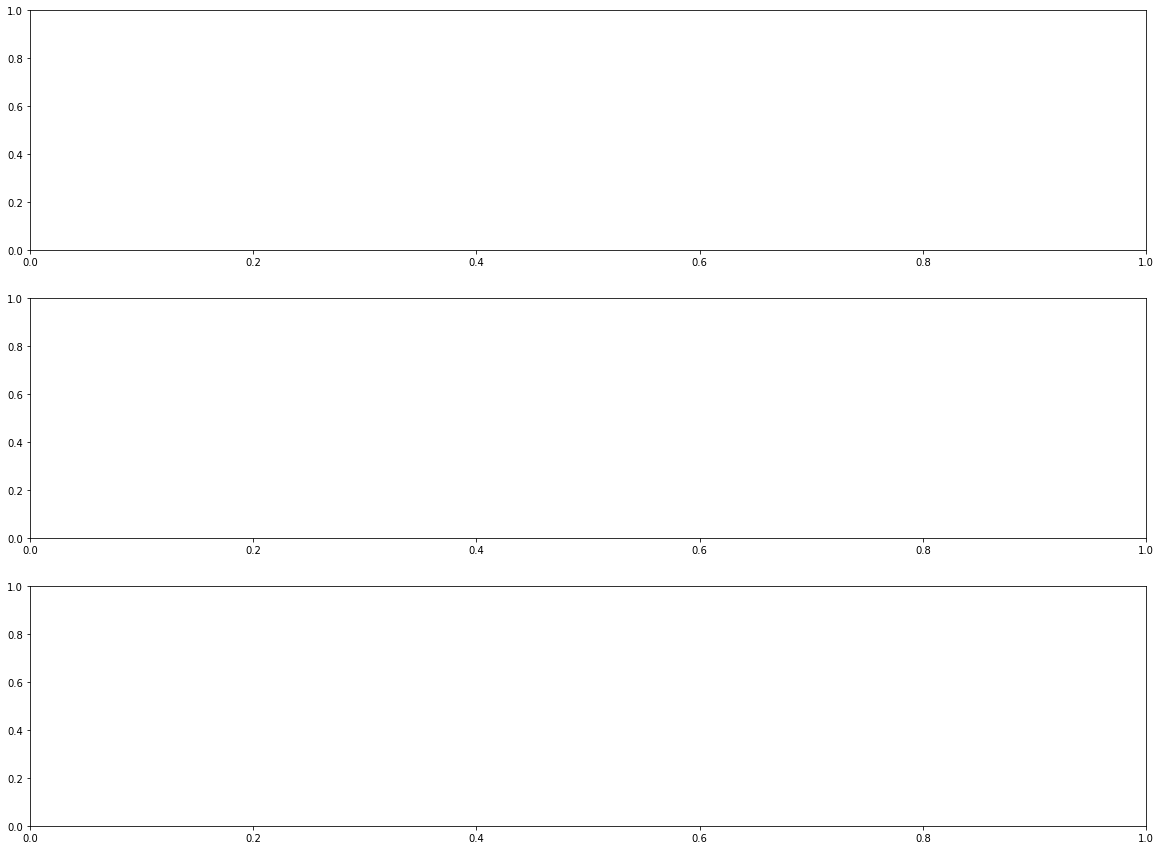

In [74]:
fig,ax = plt.subplots(3,figsize=(20,15))
ax[0].plot(Alpha_A.index.to_numpy(), Alpha_A['Spot Alpha'], label='Spot Alpha') 
ax[0].plot(Alpha_A.index.to_numpy(), Alpha_A['Carry Alpha'], label='Carry Alpha')
ax[0].plot(Alpha_A.index.to_numpy(), Alpha_A['Alpha'], label='Total Alpha')
ax[0].plot(Alpha_A.index.to_numpy(), Alpha_A['Alpha LF'], label='Total Alpha Less Fee')
ax[0].set_title('Analyst Alpha')
ax[0].legend()

ax[1].plot(Alpha_M.index.to_numpy(), Alpha_M['Spot Alpha'], label='Spot Alpha')
ax[1].plot(Alpha_M.index.to_numpy(), Alpha_M['Carry Alpha'], label='Carry Alpha')
ax[1].plot(Alpha_M.index.to_numpy(), Alpha_M['Alpha'], label='Total Alpha')
ax[1].plot(Alpha_M.index.to_numpy(), Alpha_M['Alpha LF'], label='Total Alpha Less Fee')
ax[1].set_title('Model Alpha')
ax[1].legend()

ax[2].plot(Alpha_A.index.to_numpy(), Alpha_A['Alpha'], label='Analyst Alpha')
ax[2].plot(Alpha_A.index.to_numpy(), Alpha_A['Alpha LF'], label='Analyst Alpha Less Fee')
ax[2].plot(Alpha_M.index.to_numpy(), Alpha_M['Alpha'], label='Model Alpha')
ax[2].plot(Alpha_M.index.to_numpy(), Alpha_M['Alpha LF'], label='Model Alpha Less Fee') 
ax[2].set_title('Comparison')
ax[2].legend()
        

In [49]:
Alpha_A  # in portfolio file, Alpha YTD is YTD Alpha LF here 
# this does not use only simplified pricing, it s real prices with historical weights 

,Spot Alpha,Carry Alpha,Daily Alpha,Alpha,Actual Alpha,YTD Alpha,Daily Alpha LF,Alpha LF,YTD Alpha LF,Actual Alpha LF
2021-03-18,8.894049,1.281533,7.620457,7.620457,-2.555124,7.620457,10.175581,10.175581,10.175581,4.874892e-14
2021-03-19,9.879445,3.441678,3.145541,10.765998,-2.555124,10.765998,3.145541,13.321123,13.321123,4.874892e-14
2021-03-22,-1.516345,-4.300793,-19.138261,-8.372262,-2.555124,-8.372262,-19.138261,-5.817138,-5.817138,4.874892e-14
2021-03-23,5.384928,-9.943433,1.201930,-7.170333,-8.712990,-7.170333,1.258632,-4.558505,-4.558505,-6.101163e+00
2021-03-24,9.418900,-6.537507,7.439899,0.269566,-8.712990,0.269566,7.439899,2.881393,2.881393,-6.101163e+00
...,...,...,...,...,...,...,...,...,...,...
2022-06-22,35.506574,66.088915,2.834468,82.206054,68.193863,74.585597,2.834468,101.595489,91.419907,8.758330e+01
2022-06-23,43.380647,66.487925,8.273083,90.479137,68.193863,82.858680,8.273083,109.868572,99.692990,8.758330e+01
2022-06-24,44.148595,65.766845,0.046868,90.526005,68.193863,82.905548,0.046868,109.915440,99.739858,8.758330e+01
2022-06-27,42.430378,65.119971,-2.365090,88.160915,68.193863,80.540457,-2.365090,107.550349,97.374768,8.758330e+01


In [75]:
def Perfermance_Analysis(incl_bmk=True,incl_RUB=True,incl_front=True,new_size=False):
    
    plt.style.use('seaborn-dark')
    wbn = ('B' if incl_bmk else '') + ('R' if incl_RUB else '') + ('F' if incl_front else '')
    if new_size:
        wbn = 'Portfolio Performance RUB ' + wbn + '.xlsx'
    else:
        wbn = 'Portfolio Performance ' + wbn + '.xlsx'
    if incl_bmk:
        Contrct_A = Constrct_Ct(prtf='A')
        Contrct_B = Constrct_Ct(prtf='B')
        Contrct_M = Constrct_Ct(prtf='M')
        Sumry_AP, Sumry_AB, Sumry_A, Drift_A, Curncy_BD_A = Calc_Perfmce (Contrct_A,'A',incl_bmk,incl_RUB)
        _, _, Sumry_B, Drift_B, Curncy_BD_B = Calc_Perfmce (Contrct_B,'B')
        Sumry_MP, Sumry_MB, Sumry_M, Drift_M, Curncy_BD_M = Calc_Perfmce (Contrct_M,'M',incl_bmk,incl_RUB,incl_front)
        prev_dt = Sumry_A.index[0]
        Y_EDt = []
        for dt in Sumry_A.index[1:]:
            if prev_dt.year != dt.year:
                Y_EDt.append(prev_dt)
            prev_dt = dt
        Alpha_A = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Alpha','Carry Alpha','Daily Alpha',
                                                             'Alpha','Actual Alpha','YTD Alpha',
                                                             'Daily Alpha LF','Alpha LF','YTD Alpha LF'])
        Alpha_M = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Alpha','Carry Alpha','Daily Alpha',
                                                             'Alpha','Actual Alpha','YTD Alpha',
                                                             'Daily Alpha LF','Alpha LF','YTD Alpha LF'])
        Alpha_A['Spot Alpha'] = (Sumry_A['Nominal Spot'] - Sumry_B['Nominal Spot'])/Init_Cap*10**4
        Alpha_A['Carry Alpha'] = (Sumry_A['Nominal Carry'] - Sumry_B['Nominal Carry'])/Init_Cap*10**4
        Alpha_A['Alpha'] = (Sumry_A['Nominal Capital'] - Sumry_B['Nominal Capital'])/Init_Cap*10**4
        Alpha_A['Daily Alpha'] = Alpha_A['Alpha']
        Alpha_A.loc[Alpha_A.index[1]:,'Daily Alpha'] -= Alpha_A['Daily Alpha'].shift(1)
        Alpha_A['Actual Alpha'] = (Sumry_A['Capital'] - Sumry_B['Capital'])/Init_Cap*10**4
        Alpha_A['Alpha LF'] = (Sumry_A['Nominal Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                               np.cumsum(Sumry_A['Open Fee']) - Sumry_B['Nominal Capital'] -\
                               np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_A['Daily Alpha LF'] = Alpha_A['Alpha LF']
        Alpha_A.loc[Alpha_A.index[1]:,'Daily Alpha LF'] -= Alpha_A['Daily Alpha LF'].shift(1)
        Alpha_A['Actual Alpha LF'] = (Sumry_A['Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                                      np.cumsum(Sumry_A['Open Fee']) - Sumry_B['Capital'] -\
                                      np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_A['YTD Alpha'] = Alpha_A['Alpha']
        Alpha_A['YTD Alpha LF'] = Alpha_A['Alpha LF']
        for y_edt in Y_EDt:
            y_e_alp = Alpha_A.loc[y_edt,'YTD Alpha']
            y_e_alplf = Alpha_A.loc[y_edt,'YTD Alpha LF']
            for dt in Alpha_A.index:
                if dt.year == y_edt.year+1:
                    Alpha_A.loc[dt,'YTD Alpha'] -= y_e_alp
                    Alpha_A.loc[dt,'YTD Alpha LF'] -= y_e_alplf
        
        Alpha_M['Spot Alpha'] = (Sumry_M['Nominal Spot'] - Sumry_B['Nominal Spot'])/Init_Cap*10**4
        Alpha_M['Carry Alpha'] = (Sumry_M['Nominal Carry'] - Sumry_B['Nominal Carry'])/Init_Cap*10**4
        Alpha_M['Alpha'] = (Sumry_M['Nominal Capital'] - Sumry_B['Nominal Capital'])/Init_Cap*10**4
        Alpha_M['Daily Alpha'] = Alpha_M['Alpha']
        Alpha_M.loc[Alpha_M.index[1]:,'Daily Alpha'] -= Alpha_M['Daily Alpha'].shift(1)
        Alpha_M['Actual Alpha'] = (Sumry_M['Capital'] - Sumry_B['Capital'])/Init_Cap*10**4
        Alpha_M['Alpha LF'] = (Sumry_M['Nominal Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                               np.cumsum(Sumry_M['Open Fee']) - Sumry_B['Nominal Capital'] -\
                               np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_M['Daily Alpha LF'] = Alpha_M['Alpha LF']
        Alpha_M.loc[Alpha_M.index[1]:,'Daily Alpha LF'] -= Alpha_M['Daily Alpha LF'].shift(1)
        Alpha_M['Actual Alpha LF'] = (Sumry_M['Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                                      np.cumsum(Sumry_M['Open Fee']) - Sumry_B['Capital'] -\
                                      np.cumsum(Sumry_B['Close Fee']) - np.cumsum(Sumry_B['Open Fee']))/Init_Cap*10**4
        Alpha_M['YTD Alpha'] = Alpha_M['Alpha']
        Alpha_M['YTD Alpha LF'] = Alpha_M['Alpha LF']
        for y_edt in Y_EDt:
            y_e_alp = Alpha_M.loc[y_edt,'YTD Alpha']
            y_e_alplf = Alpha_M.loc[y_edt,'YTD Alpha LF']
            for dt in Alpha_M.index:
                if dt.year == y_edt.year+1:
                    Alpha_M.loc[dt,'YTD Alpha'] -= y_e_alp
                    Alpha_M.loc[dt,'YTD Alpha LF'] -= y_e_alplf
        
        fig,ax = plt.subplots(3,figsize=(20,15))
        ax[0].plot( Alpha_A['Spot Alpha'], label='Spot Alpha') 
        ax[0].plot( Alpha_A['Carry Alpha'], label='Carry Alpha')
        ax[0].plot(Alpha_A['Alpha'], label='Total Alpha')
        ax[0].plot( Alpha_A['Alpha LF'], label='Total Alpha Less Fee')
        ax[0].set_title('Analyst Alpha')
        ax[0].legend()

        ax[1].plot( Alpha_M['Spot Alpha'], label='Spot Alpha')
        ax[1].plot( Alpha_M['Carry Alpha'], label='Carry Alpha')
        ax[1].plot( Alpha_M['Alpha'], label='Total Alpha')
        ax[1].plot(Alpha_M['Alpha LF'], label='Total Alpha Less Fee')
        ax[1].set_title('Model Alpha')
        ax[1].legend()

        ax[2].plot( Alpha_A['Alpha'], label='Analyst Alpha')
        ax[2].plot( Alpha_A['Alpha LF'], label='Analyst Alpha Less Fee')
        ax[2].plot( Alpha_M['Alpha'], label='Model Alpha')
        ax[2].plot( Alpha_M['Alpha LF'], label='Model Alpha Less Fee') 
        ax[2].set_title('Comparison')
        ax[2].legend()
        
        for dt in Y_EDt:
            print(f"The YTD alpha of analyst's portfolio of year {dt.year} is {Alpha_A.loc[dt,'YTD Alpha']:.2f}"
                f", without fee is {Alpha_A.loc[dt,'YTD Alpha LF']:.2f}")
        print(f"The YTD alpha of analyst's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Alpha_A.loc[Alpha_A.index[-1],'YTD Alpha']:.2f}"
              f", without fee is {Alpha_A.loc[Alpha_A.index[-1],'YTD Alpha LF']:.2f}")
        print(f"The alpha of analyst's portfolio is {Alpha_A.loc[Alpha_A.index[-1],'Alpha']:.2f}"
              f", without fee is {Alpha_A.loc[Alpha_A.index[-1],'Alpha LF']:.2f}")
        print(f"The tracking error of analyst's portfolio is {np.std(Alpha_A['Daily Alpha'])*np.sqrt(261):.2f}"
              f", without fee is {np.std(Alpha_A['Daily Alpha LF'])*np.sqrt(261):.2f}")
        print(f"The infomation ratio of analyst's portfolio is "
              f"{Alpha_A.loc[Alpha_A.index[-1],'Alpha']/np.std(Alpha_A['Daily Alpha'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Alpha_A.loc[Alpha_A.index[-1],'Alpha LF']/np.std(Alpha_A['Daily Alpha LF'])/np.sqrt(261):.2f}")
        for dt in Y_EDt:
            print(f"The YTD alpha of model's portfolio of year {dt.year} is {Alpha_M.loc[dt,'YTD Alpha']:.2f}"
                  f", without fee is {Alpha_M.loc[dt,'YTD Alpha LF']:.2f}")
        print(f"The YTD alpha of model's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Alpha_M.loc[Alpha_M.index[-1],'YTD Alpha']:.2f}"
              f", without fee is {Alpha_M.loc[Alpha_M.index[-1],'YTD Alpha LF']:.2f}")
        print(f"The alpha of model's portfolio is {Alpha_M.loc[Alpha_M.index[-1],'Alpha']:.2f}"
              f", without fee is {Alpha_M.loc[Alpha_M.index[-1],'Alpha LF']:.2f}")
        print(f"The tracking error of model's portfolio is {np.std(Alpha_M['Daily Alpha'])*np.sqrt(261):.2f}"
              f", without fee is {np.std(Alpha_M['Daily Alpha LF'])*np.sqrt(261):.2f}")
        print(f"The infomation ratio of model's portfolio is "
              f"{Alpha_M.loc[Alpha_M.index[-1],'Alpha']/np.std(Alpha_M['Daily Alpha'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Alpha_M.loc[Alpha_M.index[-1],'Alpha LF']/np.std(Alpha_M['Daily Alpha LF'])/np.sqrt(261):.2f}")
        
        col_name = ['Curncy','PB','OpenDate','CloeDate','SettleDate','Size','OpenSpot','OpenForward',
                    'ContrctSize','Status','SpotFlow','CarryFlow','OpenFee','CloseFee','Portfolio']
        Contrct_L = []
        for x in Contrct_A:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Analyst']
            Contrct_L.append(contrct)       
        for x in Contrct_B:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Benchmark']
            Contrct_L.append(contrct)       
        for x in Contrct_M:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Model']
            Contrct_L.append(contrct)       
        Contrct_DF = pd.DataFrame(Contrct_L,columns=col_name)
        
        col_name = []
        for name in Alpha_A:
            col_name.append('Analyst ' + name)
        for name in Alpha_A:
            col_name.append('Model ' + name)
        
        Alpha_DF = pd.concat([Alpha_A,Alpha_M],axis=1)
        Alpha_DF.columns = col_name
        
        cumsum = ['Close Fee','Spot Flow','Carry Flow','Open Fee']
        for name in cumsum:
            Sumry_AP[name] = np.cumsum(Sumry_AP[name])
            Sumry_AB[name] = np.cumsum(Sumry_AB[name])
            Sumry_MP[name] = np.cumsum(Sumry_MP[name])
            Sumry_MB[name] = np.cumsum(Sumry_MB[name])
            Sumry_B[name] = np.cumsum(Sumry_B[name])
        col_name = []
        for name in Sumry_AP:
            col_name.append('Analyst ' + name)
        Sumry_AP.columns = col_name
        Sumry_AB.columns = col_name
        col_name = []
        for name in Sumry_MP:
            col_name.append('Model ' + name)
        Sumry_MP.columns = col_name
        Sumry_MB.columns = col_name
        col_name = []
        for name in Sumry_B:
            col_name.append('Benchmark ' + name)
        Sumry_B.columns = col_name
        Sumry_AP['PB'] = 'P'
        Sumry_AB['PB'] = 'B'
        Sumry_MP['PB'] = 'P'
        Sumry_MB['PB'] = 'B'
        Sumry_B['PB'] = 'B'
        
        Sumry_DF = pd.concat([Sumry_AP,Sumry_AB,Sumry_MP,Sumry_MB,Sumry_B])
        
        Drift_A['Portfolio'] = 'Analyst'
        Drift_B['Portfolio'] = 'Benchmark'
        Drift_M['Portfolio'] = 'Model'
        
        Drift_DF = pd.concat([Drift_A,Drift_B,Drift_M])
        
        Alpha_BD_A = pd.DataFrame(index=Sumry_A.index)
        Alpha_BD_M = pd.DataFrame(index=Sumry_A.index)
        for curncy in Curncy_List:
            Alpha_BD_A[curncy+' Spot Alpha'] = (Curncy_BD_A[curncy+' Nominal Spot'] - 
                                                Curncy_BD_B[curncy+' Nominal Spot'])/Init_Cap*10**4
            Alpha_BD_A[curncy+' Carry Alpha'] = (Curncy_BD_A[curncy+' Nominal Carry'] - 
                                                 Curncy_BD_B[curncy+' Nominal Carry'])/Init_Cap*10**4
            Alpha_BD_M[curncy+' Spot Alpha'] = (Curncy_BD_M[curncy+' Nominal Spot'] - 
                                                Curncy_BD_B[curncy+' Nominal Spot'])/Init_Cap*10**4
            Alpha_BD_M[curncy+' Carry Alpha'] = (Curncy_BD_M[curncy+' Nominal Carry'] - 
                                                 Curncy_BD_B[curncy+' Nominal Carry'])/Init_Cap*10**4
        
        with pd.ExcelWriter(wbn,engine='openpyxl') as writer:
            Contrct_DF.to_excel(writer,sheet_name='Contracts',index=False,na_rep=0)
            Alpha_DF.to_excel(writer,sheet_name='Alpha',na_rep=0)
            Sumry_DF.to_excel(writer,sheet_name='Summary',na_rep=0)
            Drift_DF.to_excel(writer,sheet_name='Drift',na_rep=0)
            Alpha_BD_A.to_excel(writer,sheet_name='Analyst Alpha',na_rep=0)
            Alpha_BD_M.to_excel(writer,sheet_name='Model Alpha',na_rep=0)
        
        wb = opy.load_workbook(wbn)
        cells = wb['Alpha']['A:A'] + wb['Summary']['A:A'] + wb['Drift']['A:A'] +\
                wb['Analyst Alpha']['A:A'] + wb['Model Alpha']['A:A']
        for cell in cells:
            cell.number_format = 'mm-dd-yy' 
        wb['Alpha']['A1'] = 'Date'
        wb['Summary']['A1'] = 'Date'
        wb['Analyst Alpha']['A1'] = 'Date'
        wb['Model Alpha']['A1'] = 'Date'
        wb.save(wbn)
        
    else:
        Contrct_A = Constrct_Ct(prtf='A')
        Contrct_M = Constrct_Ct(prtf='M')
        Sumry_AP, Sumry_AB, Sumry_A, Drift_A, _ = Calc_Perfmce (Contrct_A,'A',incl_bmk,incl_RUB)
        Sumry_MP, Sumry_MB, Sumry_M, Drift_M, _ = Calc_Perfmce (Contrct_M,'M',incl_bmk,incl_RUB,incl_front)
        prev_dt = Sumry_A.index[0]
        Y_EDt = []
        for dt in Sumry_A.index[1:]:
            if prev_dt.year != dt.year:
                Y_EDt.append(prev_dt)
            prev_dt = dt
        Return_A = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Return','Carry Return','Daily Return',
                                                             'Return','Actual Return','YTD Return',
                                                             'Daily Return LF','Return LF','YTD Return LF'])
        Return_M = pd.DataFrame(0,index=Sumry_A.index,columns=['Spot Return','Carry Return','Daily Return',
                                                             'Return','Actual Return','YTD Return',
                                                             'Daily Return LF','Return LF','YTD Return LF'])

        Return_A['Spot Return'] = Sumry_A['Nominal Spot']/Init_Cap
        Return_A['Carry Return'] = Sumry_A['Nominal Carry']/Init_Cap
        Return_A['Return'] = Sumry_A['Nominal Capital']/Init_Cap-1
        Return_A['Daily Return'] = Return_A['Return']
        Return_A.loc[Return_A.index[1]:,'Daily Return'] -= Return_A['Daily Return'].shift(1)
        Return_A['Actual Return'] = Sumry_A['Capital']/Init_Cap-1
        Return_A['Return LF'] = (Sumry_A['Nominal Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                               np.cumsum(Sumry_A['Open Fee']))/Init_Cap-1
        Return_A['Daily Return LF'] = Return_A['Return LF']
        Return_A.loc[Return_A.index[1]:,'Daily Return LF'] -= Return_A['Daily Return LF'].shift(1)
        Return_A['Actual Return LF'] = (Sumry_A['Capital'] + np.cumsum(Sumry_A['Close Fee']) +\
                                      np.cumsum(Sumry_A['Open Fee']))/Init_Cap-1
        Return_A['YTD Return'] = Return_A['Return']
        Return_A['YTD Return LF'] = Return_A['Return LF']
        for y_edt in Y_EDt:
            y_e_rt = Return_A.loc[y_edt,'YTD Return']
            y_e_rtlf = Return_A.loc[y_edt,'YTD Return LF']
            for dt in Return_A.index:
                if dt.year == y_edt.year+1:
                    Return_A.loc[dt,'YTD Return'] -= y_e_rt
                    Return_A.loc[dt,'YTD Return LF'] -= y_e_rtlf
        
        Return_M['Spot Return'] = Sumry_M['Nominal Spot']/Init_Cap
        Return_M['Carry Return'] = Sumry_M['Nominal Carry']/Init_Cap
        Return_M['Return'] = Sumry_M['Nominal Capital']/Init_Cap-1
        Return_M['Daily Return'] = Return_M['Return']
        Return_M.loc[Return_M.index[1]:,'Daily Return'] -= Return_M['Daily Return'].shift(1)
        Return_M['Actual Return'] = Sumry_M['Capital']/Init_Cap-1
        Return_M['Return LF'] = (Sumry_M['Nominal Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                               np.cumsum(Sumry_M['Open Fee']))/Init_Cap-1
        Return_M['Daily Return LF'] = Return_M['Return LF']
        Return_M.loc[Return_M.index[1]:,'Daily Return LF'] -= Return_M['Daily Return LF'].shift(1)
        Return_M['Actual Return LF'] = (Sumry_M['Capital'] + np.cumsum(Sumry_M['Close Fee']) +\
                                      np.cumsum(Sumry_M['Open Fee']))/Init_Cap-1
        Return_M['YTD Return'] = Return_M['Return']
        Return_M['YTD Return LF'] = Return_M['Return LF']
        for y_edt in Y_EDt:
            y_e_rt = Return_M.loc[y_edt,'YTD Return']
            y_e_rtlf = Return_M.loc[y_edt,'YTD Return LF']
            for dt in Return_M.index:
                if dt.year == y_edt.year+1:
                    Return_M.loc[dt,'YTD Return'] -= y_e_rt
                    Return_M.loc[dt,'YTD Return LF'] -= y_e_rtlf
        
        fig,ax = plt.subplots(3,figsize=(20,15))
        ax[0].plot( Return_A['Spot Return'],label = 'Spot Return')
        ax[0].plot(Return_A['Carry Return'],label = 'Carry Return')
        ax[0].plot( Return_A['Return'],label = 'Total Return')
        ax[0].plot(Return_A['Return LF'],label = 'Total Return Less Fee')
        ax[0].set_title('Analyst Return')
        ax[0].legend()

        ax[1].plot( Return_M['Spot Return'],label = 'Spot Return')
        ax[1].plot(Return_M['Carry Return'],label = 'Carry Return')
        ax[1].plot( Return_M['Return'],label = 'Total Return')
        ax[1].plot( Return_M['Return LF'],label = 'Total Return Less Fee')
        ax[1].set_title('Model Return')
        ax[1].legend()

        ax[2].plot( Return_A['Return'],label = 'Analyst Return')
        ax[2].plot( Return_A['Return LF'],label = 'Analyst Return Less Fee')
        ax[2].plot( Return_M['Return'],label = 'Model Return')
        ax[2].plot( Return_M['Return LF'],label = 'Model Return Less Fee')
        ax[2].set_title('Comparison')
        ax[2].legend()
        
        for dt in Y_EDt:
            print(f"The YTD Return of analyst's portfolio of year {dt.year} is {Return_A.loc[dt,'YTD Return']:.2%}"
                f", without fee is {Return_A.loc[dt,'YTD Return LF']:.2%}")
        print(f"The YTD Return of analyst's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Return_A.loc[Return_A.index[-1],'YTD Return']:.2%}"
              f", without fee is {Return_A.loc[Return_A.index[-1],'YTD Return LF']:.2%}")
        print(f"The Return of analyst's portfolio is {Return_A.loc[Return_A.index[-1],'Return']:.2%}"
              f", without fee is {Return_A.loc[Return_A.index[-1],'Return LF']:.2%}")
        print(f"The risk of analyst's portfolio is {np.std(Return_A['Daily Return'])*np.sqrt(261):.2%}"
              f", without fee is {np.std(Return_A['Daily Return LF'])*np.sqrt(261):.2%}")
        print(f"The sharpe ratio of analyst's portfolio is "
              f"{Return_A.loc[Return_A.index[-1],'Return']/np.std(Return_A['Daily Return'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Return_A.loc[Return_A.index[-1],'Return LF']/np.std(Return_A['Daily Return LF'])/np.sqrt(261):.2f}")
        for dt in Y_EDt:
            print(f"The YTD Return of model's portfolio of year {dt.year} is {Return_M.loc[dt,'YTD Return']:.2%}"
                  f", without fee is {Return_M.loc[dt,'YTD Return LF']:.2%}")
        print(f"The YTD Return of model's portfolio of year {Y_EDt[-1].year+1} is "
              f"{Return_M.loc[Return_M.index[-1],'YTD Return']:.2%}"
              f", without fee is {Return_M.loc[Return_M.index[-1],'YTD Return LF']:.2%}")
        print(f"The Return of model's portfolio is {Return_M.loc[Return_M.index[-1],'Return']:.2%}"
              f", without fee is {Return_M.loc[Return_M.index[-1],'Return LF']:.2%}")
        print(f"The risk of model's portfolio is {np.std(Return_M['Daily Return'])*np.sqrt(261):.2%}"
              f", without fee is {np.std(Return_M['Daily Return LF'])*np.sqrt(261):.2%}")
        print(f"The sharpe ratio of model's portfolio is "
              f"{Return_M.loc[Return_M.index[-1],'Return']/np.std(Return_M['Daily Return'])/np.sqrt(261):.2f}"
              f", without fee is "
              f"{Return_M.loc[Return_M.index[-1],'Return LF']/np.std(Return_M['Daily Return LF'])/np.sqrt(261):.2f}")
        
        col_name = ['Curncy','PB','OpenDate','CloeDate','SettleDate','Size','OpenSpot','OpenForward',
                    'ContrctSize','Status','SpotFlow','CarryFlow','OpenFee','CloseFee','Portfolio']
        Contrct_L = []
        for x in Contrct_A:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Analyst']
            Contrct_L.append(contrct)   
        for x in Contrct_M:
            contrct = [x.curncy,x.PB,x.op_dt,x.cl_dt,x.stl_dt,x.size,x.op_sp,
                             x.op_fwd,x.c_size,x.stat,x.sp_fl,x.c_fl,x.op_f,x.cl_f,'Model']
            Contrct_L.append(contrct)       
        
        Contrct_DF = pd.DataFrame(Contrct_L,columns=col_name)
        
        col_name = []
        for name in Return_A:
            col_name.append('Analyst ' + name)
        for name in Return_A:
            col_name.append('Model ' + name)
        
        Return_DF = pd.concat([Return_A,Return_M],axis=1)
        Return_DF.columns = col_name
        
        cumsum = ['Close Fee','Spot Flow','Carry Flow','Open Fee']
        for name in cumsum:
            Sumry_AP[name] = np.cumsum(Sumry_AP[name])
            Sumry_AB[name] = np.cumsum(Sumry_AB[name])
            Sumry_MP[name] = np.cumsum(Sumry_MP[name])
            Sumry_MB[name] = np.cumsum(Sumry_MB[name])
        col_name = []
        for name in Sumry_AP:
            col_name.append('Analyst ' + name)
        Sumry_AP.columns = col_name
        Sumry_AB.columns = col_name
        col_name = []
        for name in Sumry_MP:
            col_name.append('Model ' + name)
        Sumry_MP.columns = col_name
        Sumry_MB.columns = col_name
        Sumry_AP['PB'] = 'P'
        Sumry_AB['PB'] = 'B'
        Sumry_MP['PB'] = 'P'
        Sumry_MB['PB'] = 'B'
        
        Sumry_DF = pd.concat([Sumry_AP,Sumry_AB,Sumry_MP,Sumry_MB])
        
        Drift_A['Portfolio'] = 'Analyst'
        Drift_M['Portfolio'] = 'Model'
        
        Drift_DF = pd.concat([Drift_A,Drift_M])
        
        with pd.ExcelWriter(wbn,engine='openpyxl') as writer:
            Contrct_DF.to_excel(writer,sheet_name='Contracts',index=False,na_rep=0)
            Return_DF.to_excel(writer,sheet_name='Return',na_rep=0)
            Sumry_DF.to_excel(writer,sheet_name='Summary',na_rep=0)
            Drift_DF.to_excel(writer,sheet_name='Drift',na_rep=0)
        
        wb = opy.load_workbook(wbn)
        cells = wb['Return']['A:A'] + wb['Summary']['A:A'] + wb['Drift']['A:A']
        for cell in cells:
            cell.number_format = 'mm-dd-yy' 
        wb['Return']['A1'] = 'Date'
        wb['Summary']['A1'] = 'Date'
        wb['Drift']['A1'] = 'Date'
        wb.save(wbn)
            
    return

In [79]:
pip install chartpy

Looking in indexes: https://repository.saas.cagip.group.gca/artifactory/api/pypi/pypi-remote/simple



In [ ]:
sumry

In [86]:
from chartpy import Chart

Contrct_A = Constrct_Ct(prtf='A')

# Calculate performance for the benchmark portfolio
_, _, Sumry_A, _, _ = Calc_Perfmce(Contrct_A, prtf='A')

# Extract the benchmark's total nominal return
Prtf_return = Sumry_A['Nominal Capital'] / Sumry_A['Nominal Capital'].iloc[0] - 1
'''
# Plot the benchmark return
chart = Chart(engine='plotly')
chart.plot(benchmark_return, title='Benchmark Portfolio Return')

# Alternatively, you can plot the benchmark return alongside other portfolio returns
# ... (Calculate returns for other portfolios, e.g., Sumry_A for portfolio 'A')

# Combine returns into a single DataFrame
returns_df = pd.DataFrame({'Benchmark': benchmark_return, 
                           # 'Portfolio A': portfolio_A_return, 
                           # ... add other portfolios
                           })

# Plot all returns together
chart.plot(returns_df, title='Portfolio Returns vs. Benchmark')'''

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:35: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:39: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:43: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:44: Futu

"\n# Plot the benchmark return\nchart = Chart(engine='plotly')\nchart.plot(benchmark_return, title='Benchmark Portfolio Return')\n\n# Alternatively, you can plot the benchmark return alongside other portfolio returns\n# ... (Calculate returns for other portfolios, e.g., Sumry_A for portfolio 'A')\n\n# Combine returns into a single DataFrame\nreturns_df = pd.DataFrame({'Benchmark': benchmark_return, \n                           # 'Portfolio A': portfolio_A_return, \n                           # ... add other portfolios\n                           })\n\n# Plot all returns together\nchart.plot(returns_df, title='Portfolio Returns vs. Benchmark')"

In [87]:
Prtf_return

2021-03-18    0.000000
2021-03-19    0.002456
2021-03-22   -0.005046
2021-03-23   -0.011016
2021-03-24   -0.013008
                ...   
2022-06-22   -0.051256
2022-06-23   -0.052268
2022-06-24   -0.048803
2022-06-27   -0.047472
2022-06-28   -0.051079
Name: Nominal Capital, Length: 334, dtype: float64

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_26188/3736318981.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compati

The YTD alpha of analyst's portfolio of year 2021 is 79.67, without fee is 93.08
The YTD alpha of analyst's portfolio of year 2022 is 11.44, without fee is 17.27
The alpha of analyst's portfolio is 91.11, without fee is 110.34
The tracking error of analyst's portfolio is 67.27, without fee is 67.31
The infomation ratio of analyst's portfolio is 1.35, without fee is 1.64
The YTD alpha of model's portfolio of year 2021 is 88.47, without fee is 125.06
The YTD alpha of model's portfolio of year 2022 is -4.84, without fee is 8.63
The alpha of model's portfolio is 83.62, without fee is 133.69
The tracking error of model's portfolio is 142.24, without fee is 142.46
The infomation ratio of model's portfolio is 0.59, without fee is 0.94


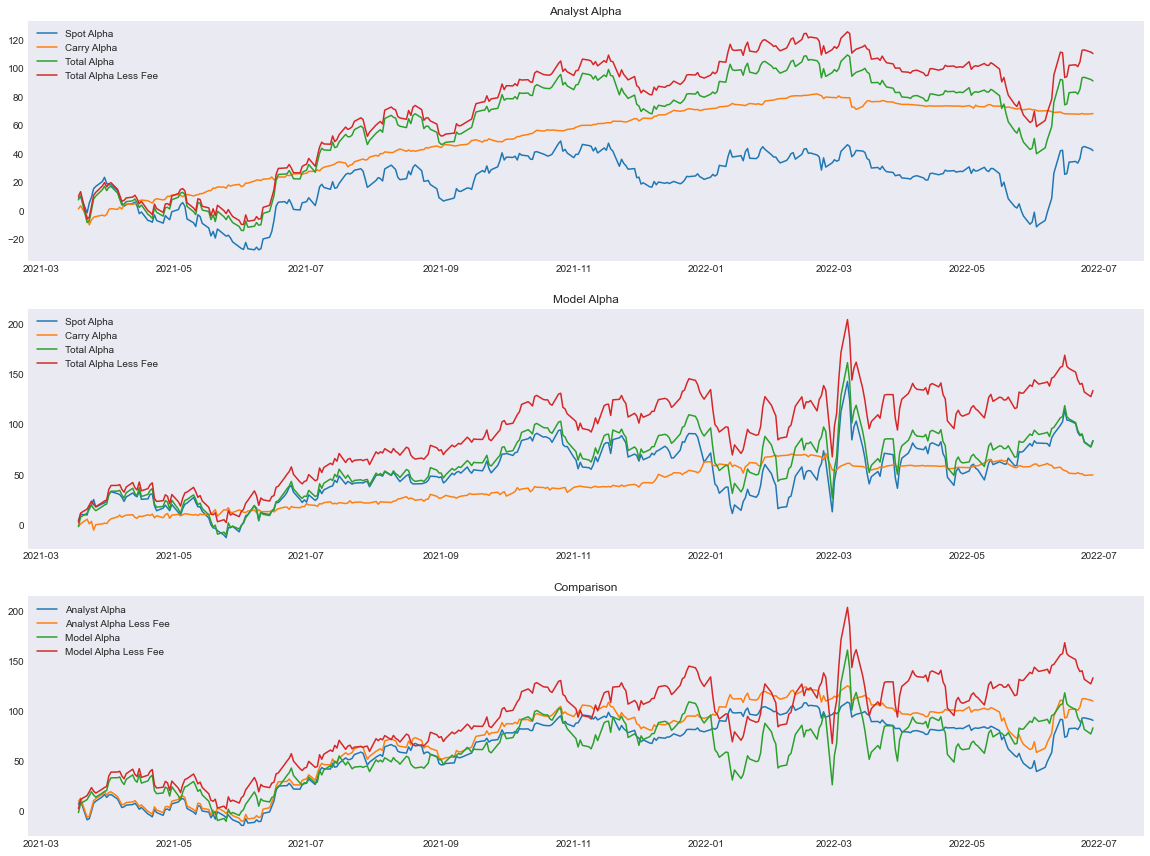

In [76]:
Perfermance_Analysis(incl_bmk=True,incl_RUB=True,incl_front=True)

In [76]:
print(Alpha_A['Spot Alpha'].shape)


(334,)


C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compati

The YTD alpha of analyst's portfolio of year 2021 is 83.83, without fee is 96.88
The YTD alpha of analyst's portfolio of year 2022 is 10.86, without fee is 16.78
The alpha of analyst's portfolio is 94.70, without fee is 113.66
The tracking error of analyst's portfolio is 65.34, without fee is 65.55
The infomation ratio of analyst's portfolio is 1.45, without fee is 1.73
The YTD alpha of model's portfolio of year 2021 is 95.20, without fee is 130.98
The YTD alpha of model's portfolio of year 2022 is 108.02, without fee is 126.47
The alpha of model's portfolio is 203.22, without fee is 257.45
The tracking error of model's portfolio is 131.49, without fee is 131.80
The infomation ratio of model's portfolio is 1.55, without fee is 1.95


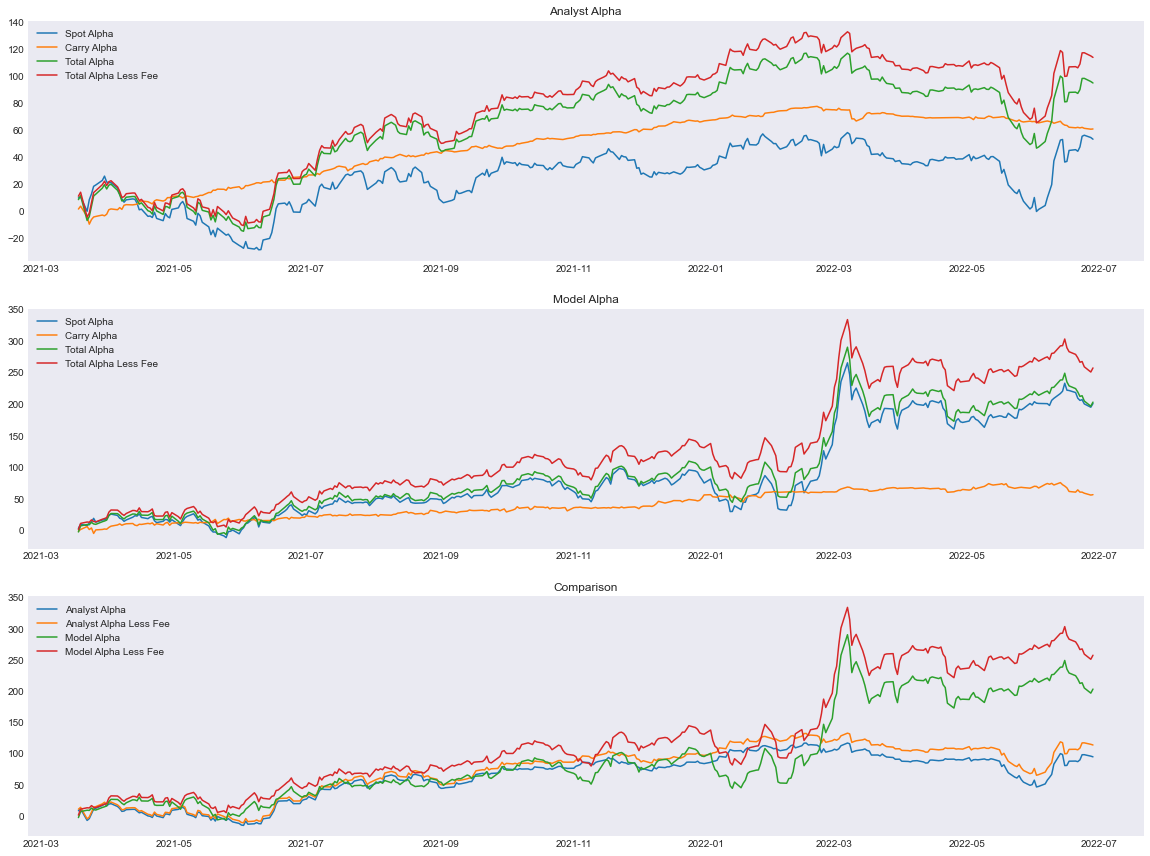

In [77]:
Perfermance_Analysis(incl_bmk=True,incl_RUB=False,incl_front=True)

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compati

The YTD alpha of analyst's portfolio of year 2021 is 83.83, without fee is 96.88
The YTD alpha of analyst's portfolio of year 2022 is 10.86, without fee is 16.78
The alpha of analyst's portfolio is 94.70, without fee is 113.66
The tracking error of analyst's portfolio is 65.34, without fee is 65.55
The infomation ratio of analyst's portfolio is 1.45, without fee is 1.73
The YTD alpha of model's portfolio of year 2021 is 77.55, without fee is 110.96
The YTD alpha of model's portfolio of year 2022 is 124.89, without fee is 142.65
The alpha of model's portfolio is 202.44, without fee is 253.62
The tracking error of model's portfolio is 120.96, without fee is 121.28
The infomation ratio of model's portfolio is 1.67, without fee is 2.09


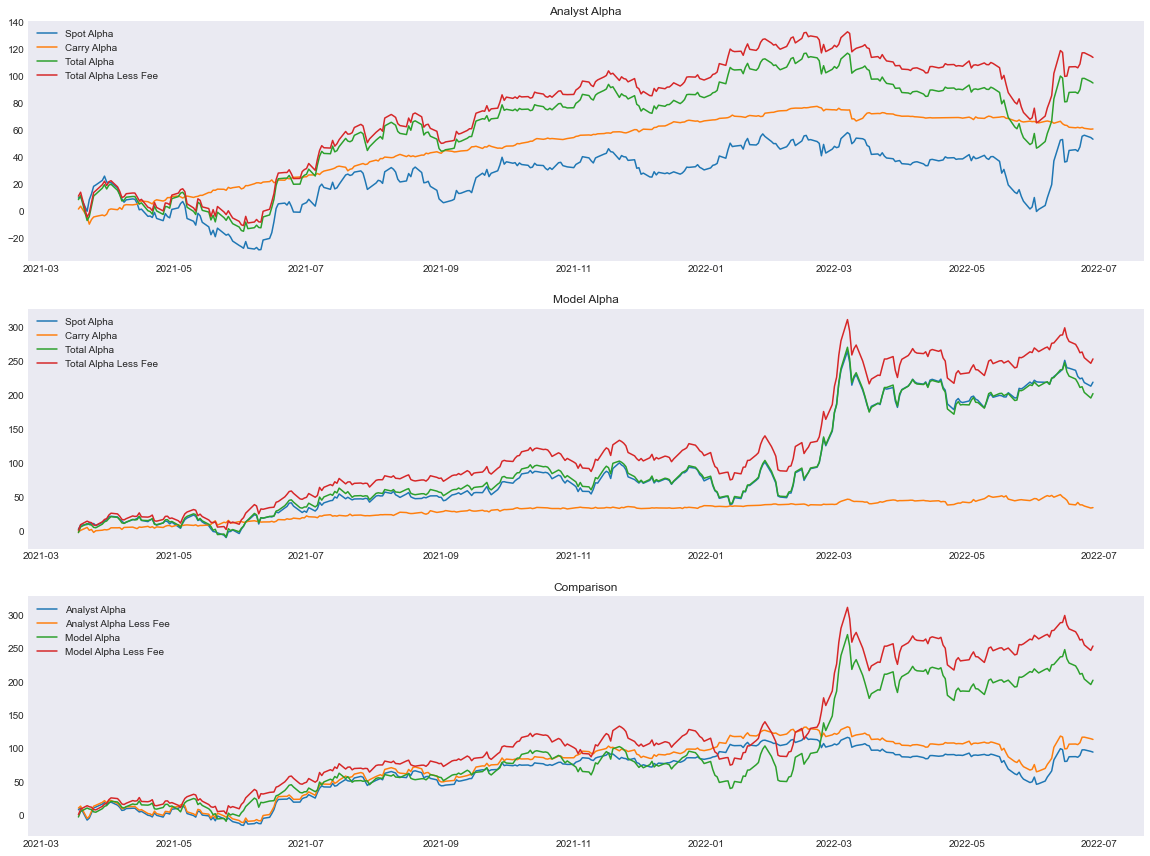

In [78]:
Perfermance_Analysis(incl_bmk=True,incl_RUB=False,incl_front=False)

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compati

The YTD Return of analyst's portfolio of year 2021 is 0.80%, without fee is 0.94%
The YTD Return of analyst's portfolio of year 2022 is 0.11%, without fee is 0.17%
The Return of analyst's portfolio is 0.91%, without fee is 1.10%
The risk of analyst's portfolio is 0.70%, without fee is 0.70%
The sharpe ratio of analyst's portfolio is 1.30, without fee is 1.58
The YTD Return of model's portfolio of year 2021 is 0.89%, without fee is 1.26%
The YTD Return of model's portfolio of year 2022 is -0.11%, without fee is 0.08%
The Return of model's portfolio is 0.78%, without fee is 1.34%
The risk of model's portfolio is 1.48%, without fee is 1.48%
The sharpe ratio of model's portfolio is 0.53, without fee is 0.90


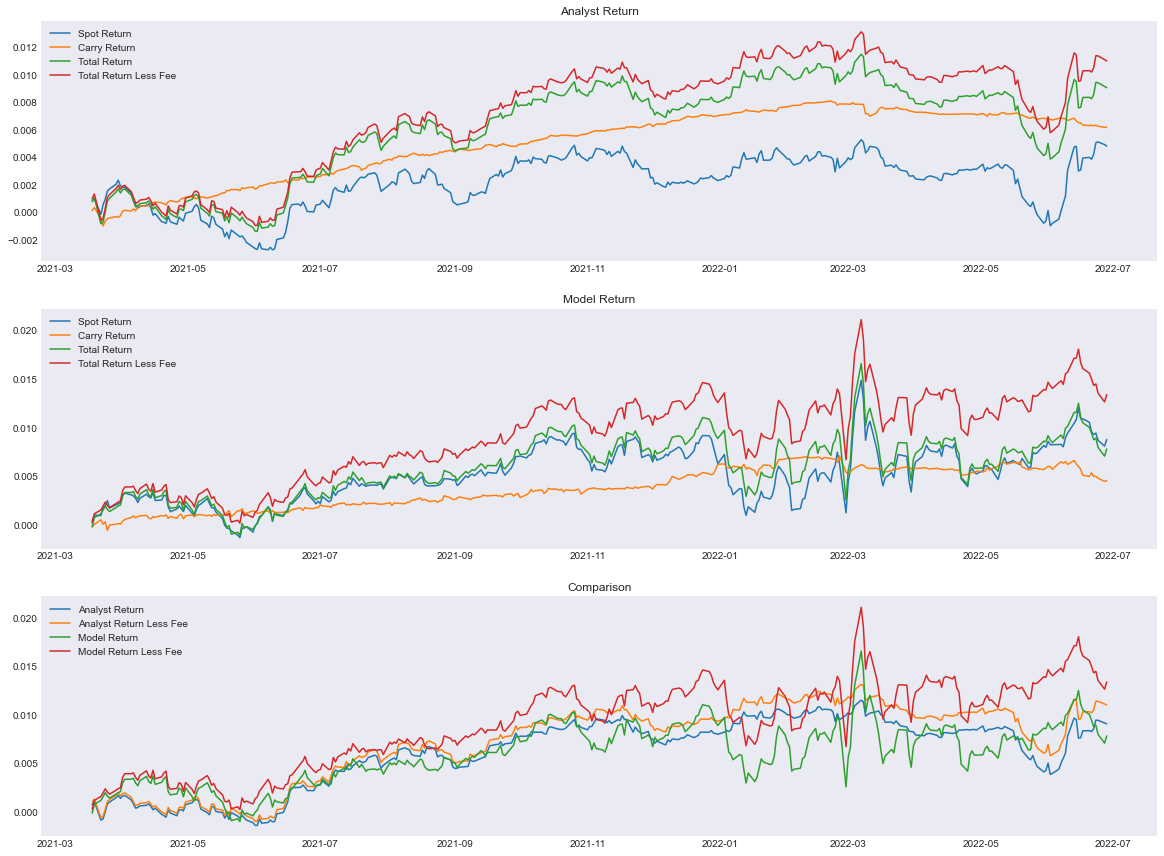

In [79]:
Perfermance_Analysis(incl_bmk=False,incl_RUB=True,incl_front=True)

C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9641.867497574194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Spot MTM'] += v_sp
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-47.9450008470682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Curncy_BD.loc[dt,x.curncy+' Carry MTM'] += v_c
C:\Users\UT3P5T\AppData\Local\Temp\1/ipykernel_29256/3736318981.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1387.5826768011593' has dtype incompatible with int64, please explicitly cast to a compati

The YTD Return of analyst's portfolio of year 2021 is 0.84%, without fee is 0.97%
The YTD Return of analyst's portfolio of year 2022 is 0.15%, without fee is 0.21%
The Return of analyst's portfolio is 0.99%, without fee is 1.18%
The risk of analyst's portfolio is 0.68%, without fee is 0.68%
The sharpe ratio of analyst's portfolio is 1.45, without fee is 1.72
The YTD Return of model's portfolio of year 2021 is 0.96%, without fee is 1.32%
The YTD Return of model's portfolio of year 2022 is 1.16%, without fee is 1.35%
The Return of model's portfolio is 2.12%, without fee is 2.67%
The risk of model's portfolio is 1.37%, without fee is 1.38%
The sharpe ratio of model's portfolio is 1.55, without fee is 1.94


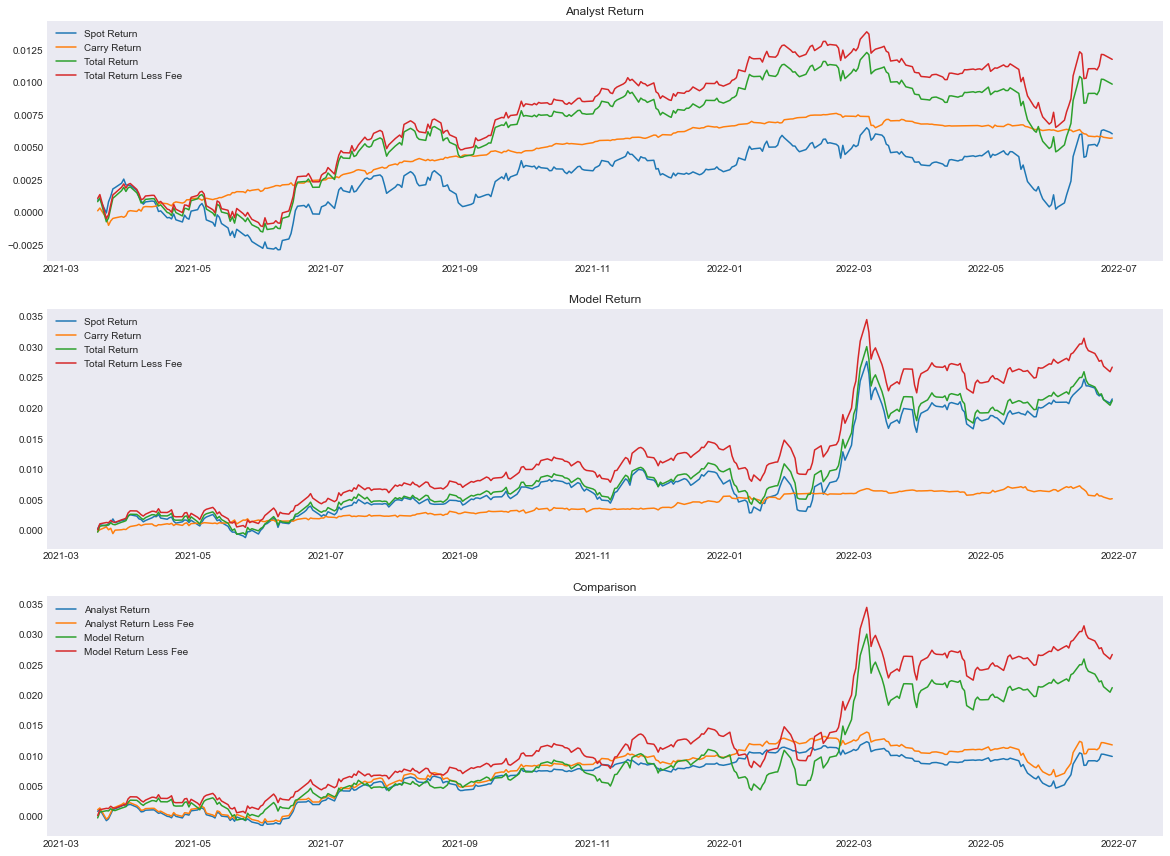

In [80]:
Perfermance_Analysis(incl_bmk=False,incl_RUB=False,incl_front=True)

In [ ]:
Perfermance_Analysis(incl_bmk=False,incl_RUB=False,incl_front=False)

In [ ]:
SIZE_M = pd.read_excel(data_file, 'Size_M (2)',header=0,index_col=0).dropna()
dt_index = [x.date() for x in SIZE_M.index.tolist()]
SIZE_M.index = dt_index

The YTD alpha of analyst's portfolio of year 2021 is 79.76, without fee is 93.18
The YTD alpha of analyst's portfolio of year 2022 is 9.01, without fee is 15.03
The alpha of analyst's portfolio is 88.77, without fee is 108.21
The tracking error of analyst's portfolio is 67.32, without fee is 67.36
The infomation ratio of analyst's portfolio is 1.32, without fee is 1.61
The YTD alpha of model's portfolio of year 2021 is 58.46, without fee is 99.46
The YTD alpha of model's portfolio of year 2022 is 73.56, without fee is 95.02
The alpha of model's portfolio is 132.03, without fee is 194.48
The tracking error of model's portfolio is 152.21, without fee is 152.65
The infomation ratio of model's portfolio is 0.87, without fee is 1.27


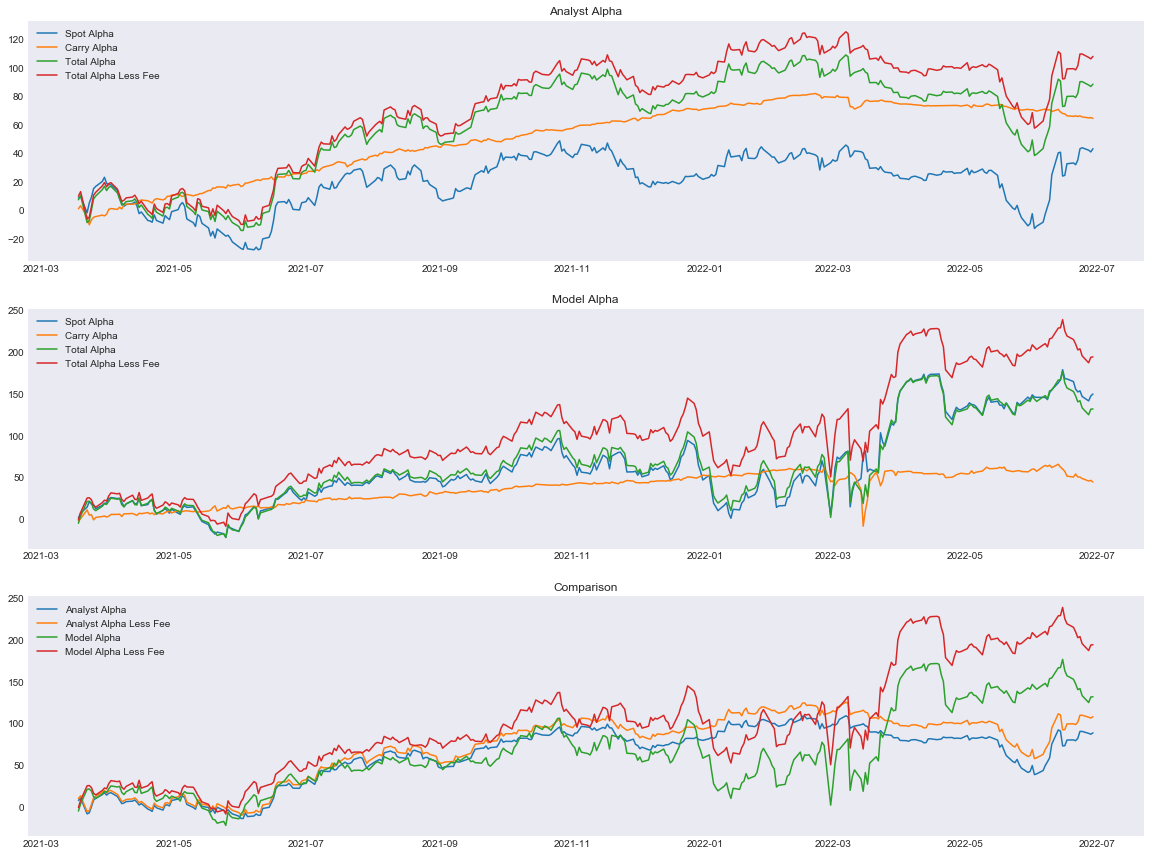

In [ ]:
Perfermance_Analysis(incl_bmk=True,incl_RUB=True,incl_front=True,new_size=True)

In [ ]:
Perfermance_Analysis(incl_bmk=False,incl_RUB=True,incl_front=True,new_size=True)

In [59]:
contracts

In [62]:
# test performance analysis only long BRL Forward 

Perfermance_Analysis(incl_bmk=False, incl_RUB=False, incl_front=False)  # Analyze without benchmark
'''
    # Load the performance data from the Excel file
performance_data = pd.read_excel("Portfolio Performance .xlsx", sheet_name='Return', index_col="Date")
# Plot the BRL portfolio performance
plt.figure(figsize=(12, 6))
plt.plot(performance_data.index, performance_data["Analyst Return"], label="BRL Portfolio Return")
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("BRL Long Forward Portfolio Performance")
plt.legend()
plt.grid(True)
plt.show()
test_BRL_long_forward_performance()
'''

KeyError: datetime.date(2024, 10, 15)